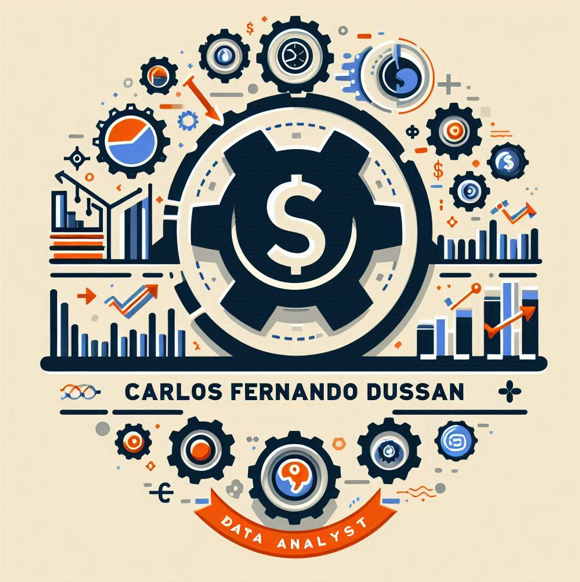

###                    cafedusriv@gmail.com

### https://www.linkedin.com/in/carlosfdussan

# PROYECTO INTEGRADOR MODULO 4: BIOGENESYS

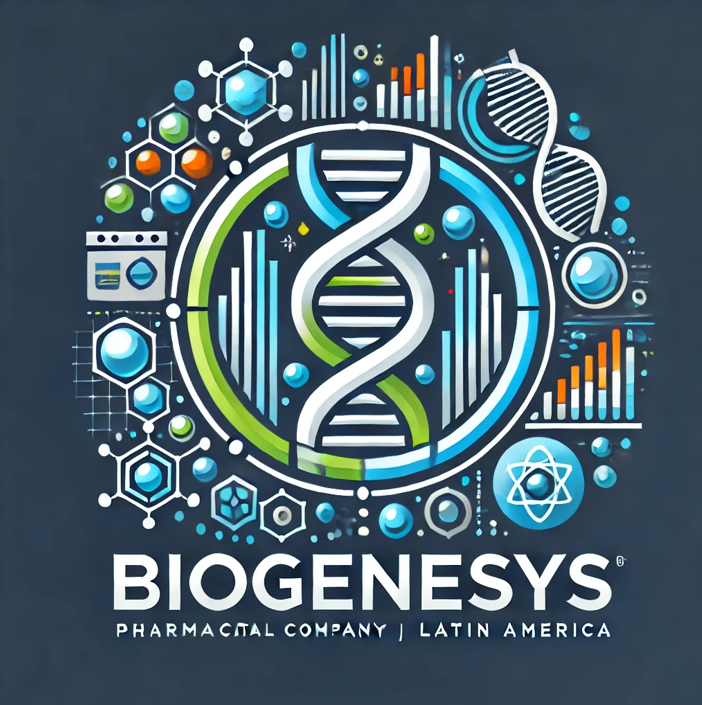

## AVANCE 1

### Paso 1: Leer Readme.txt

### Paso 2: Crear el Notebook y Preparar el Entorno

Crear el notebook "PIDA_M4_Carlos_Fernando_Dussan.ipynb"

Preparamos el entorno

In [1]:
# Instalamos seaborn
! pip install seaborn

In [2]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib  # Para poder establecer la version que se maneja, aunque no es necesario importar
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Imprimir versiones para asegurarnos de que estamos utilizando las correctas
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Numpy version: 2.0.0
Matplotlib version: 3.9.0
Seaborn version: 0.13.2


In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #Utilizamos para evitar advertencias por temas de presentacion

In [5]:
# Establecemos el estado de dependencia
! pip freeze > requirements.txt # Para actualizar mi estado de dependencia

### Paso 3: Leer el Archivo data_latinoamerica.csv

In [6]:
# Leer el archivo CSV
df_latinoamerica = pd.read_csv('data_latinoamerica.csv',sep=',') #Puedo traerlo (leerlo) de esta manera al estar al mismo nivel
                               
# En caso de de haber tenido que generar la ruta del archivo por encontrarse en diferente carpeta, en distinto nivel, el paso
# hubiera sido el siguiente:

# Definir la ruta del archivo (segun mi caso especifico)
# file_latinoamerica = r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\data_latinoamerica.csv'

# Leer el archivo CSV
# df_latinoamerica = pd.read_csv(file_latinoamerica)

# Este proceso puede demorar algunos minutos
print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [7]:
# Realizamos una visualización rapida, obteniendo las primeras filas del DataFrame
df_latinoamerica.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

### Paso 4: Verificar la Cantidad de Registros y Columnas

In [8]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_latinoamerica.shape[0]}")
print(f"Columnas: {df_latinoamerica.shape[1]}")

Registros: 12216057
Columnas: 50


### Paso 5: Seleccionar Países de Interés

In [9]:
# Seleccionar los países de interés
paises_interes = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil'] # Me doy cuenta que al utilizar tildes los datos me habian dado diferentes
df_latinoamerica = df_latinoamerica[df_latinoamerica['country_name'].isin(paises_interes)] #Utilizamos isin() para filtrar

# Verificamos que los datos filtrados
print(f"Datos filtrados por países de interés. Registros: {df_latinoamerica.shape[0]}")

Datos filtrados por países de interés. Registros: 11970289


In [10]:
# Confirmo datos actuales de registros (filas) y columnas
print(f"Datos filtrados por países de interés. Registros: {df_latinoamerica.shape[0]}, Columnas: {df_latinoamerica.shape[1]}")

Datos filtrados por países de interés. Registros: 11970289, Columnas: 50


In [11]:
# Analizo cantidad por pais
df_latinoamerica['country_name'].value_counts()

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64

Me pregunto que tan buena es la calidad de nuestros datos que tenemos. Verificaremos la cantidad de datos faltantes por columna y si es necesario haremos una limpieza de los datos donde se presenten valores mayores a 2.5 millones de datos faltantes.

In [12]:
df_latinoamerica.isnull().sum()[df_latinoamerica.isnull().sum()>2500000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [13]:
# A su vez verifico que datos no tienen faltantes por columna
print(df_latinoamerica['location_key'].isnull().sum())
df_latinoamerica.isnull().sum()[df_latinoamerica.isnull().sum()<1]

0


location_key    0
date            0
country_code    0
country_name    0
dtype: int64

Me queda claro que las 'location_key', 'date', 'country_code' y 'country_name' no presentan faltantes (null)

Analizo las 'location_key' para conocer la composicion de los datos

In [14]:
# Conocemos mas sobre nuestro DataFrame y la composición del 'location_key'
df_latinoamerica['location_key'].value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

Al darme cuenta que existen valores por regiones, decido filtran solo los correspondientes a la información general mediante AR, CL, CO, MX, PE, BR

In [15]:
df_latinoamerica_paises=df_latinoamerica[df_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [16]:
# Verificamos que los datos filtrados
print(f"Datos filtrados por países de interés. Registros: {df_latinoamerica_paises.shape[0]}")

Datos filtrados por países de interés. Registros: 5946


### Paso 6: Filtrar por Fechas Mayores a 2021-01-01

In [17]:
# Filtrar los datos en fechas mayores a 2021-01-01
data_latinoamerica_paises_Fecha = df_latinoamerica_paises[df_latinoamerica_paises['date'] > '2021-01-01']

print(f"Datos filtrados por fecha. Registros: {data_latinoamerica_paises_Fecha.shape[0]}")

Datos filtrados por fecha. Registros: 3744


Los registros se nos limitan a solo 3744

### Paso 7: Completar Valores Faltantes a Nivel de País

Hemos realizado anteriormente el analisis de los datos por pais y por su 'location_key'.
Teniendo en cuanta el punto Paso 8, procedemos a llenar datos faltantes

Con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacíos

In [18]:
# Contamos valores nulos
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [19]:
print(np.shape(data_latinoamerica_paises_Fecha))

(3744, 50)


Observo que tenemos columnas con mas del 50% de los datos nulos o faltante y otra con el 15.60%

Completamos los valores faltantes

### Paso 8: Limpieza Preliminar de Datos

Teniendo en cuenta el paso 7, realizamos la limpieza preliminar teniendo en cuenta los valores por países y la utilización de la media.
En el paso 5, meidante los distintos filtros se realizaron la eliminación de algunos datos que resultarian faltantes.

In [20]:
# Para usar el for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_interes:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['cumulative_deceased'].mean())
    #data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['cumulative_vaccine_doses_administered'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['maximum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['relative_humidity'].mean())

# Llenar NaN con el valor de 0 en la columna 'new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered' para hacer análisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11528\2830631691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name'] == pais]['new_confirmed'].mean())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11528\2830631691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased'] =

Nuevamente verificamos la cantidad de instancias vacías y las dimensiones del nuevo dataset.

In [21]:
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3744, 50)


### Paso 9: Examinar Características Básicas del Dataset

In [22]:
# Examinamos la cantidad de registros y columnas
print(f"Registros: {data_latinoamerica_paises_Fecha.shape[0]}")
print(f"Columnas: {data_latinoamerica_paises_Fecha.shape[1]}")

Registros: 3744
Columnas: 50


In [23]:
# Conocemos nuestros primeros cinco registros
data_latinoamerica_paises_Fecha.head()

location_key        date country_code country_name  new_confirmed  \
367           AR  2021-01-02           AR    Argentina         7767.0   
368           AR  2021-01-03           AR    Argentina         4934.0   
369           AR  2021-01-04           AR    Argentina        13953.0   
370           AR  2021-01-05           AR    Argentina        14085.0   
371           AR  2021-01-06           AR    Argentina        14496.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   
368                                20529.0  44938712.0  ...   
369                                25164.0  44938712.0  ...   
370                                29852.0  44938712.0  ...   
371                                34162.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8            0.0   
368                      26.6                        15.8            0.0   
369                      26.6                        15.8            0.0   
370                      26.6                        15.8            0.0   
371                      26.6                        15.8            0.0   

     cumulative_recovered  
367                   0.0  
368                   0.0  
369                   0.0  
370                   0.0  
371                   0.0  

[5 rows x 50 columns]

In [24]:
# Conocemos nuestros últimos cinco registros
data_latinoamerica_paises_Fecha.tail()

location_key        date country_code country_name  new_confirmed  \
10253872           PE  2022-09-13           PE         Peru    1150.000000   
10253873           PE  2022-09-14           PE         Peru    7407.414516   
10253874           PE  2022-09-15           PE         Peru    7407.414516   
10253875           PE  2022-09-16           PE         Peru    7407.414516   
10253876           PE  2022-09-17           PE         Peru    7407.414516   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
10253872     22.000000          4.127612e+06        216173.000000   
10253873    185.096774          4.765656e+06        124442.124194   
10253874    185.096774          4.765656e+06        124442.124194   
10253875    185.096774          4.765656e+06        124442.124194   
10253876    185.096774          4.765656e+06        124442.124194   

          cumulative_vaccine_doses_administered  population  ...  \
10253872                                    0.0  29381884.0  ...   
10253873                                    0.0  29381884.0  ...   
10253874                                    0.0  29381884.0  ...   
10253875                                    0.0  29381884.0  ...   
10253876                                    0.0  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
10253872           76.516                     146.37   
10253873           76.516                     146.37   
10253874           76.516                     146.37   
10253875           76.516                     146.37   
10253876           76.516                     146.37   

          adult_female_mortality_rate  pollution_mortality_rate  \
10253872                       84.815                      63.9   
10253873                       84.815                      63.9   
10253874                       84.815                      63.9   
10253875                       84.815                      63.9   
10253876                       84.815                      63.9   

          comorbidity_mortality_rate  new_recovered  cumulative_recovered  
10253872                        12.6            0.0                   0.0  
10253873                        12.6            0.0                   0.0  
10253874                        12.6            0.0                   0.0  
10253875                        12.6            0.0                   0.0  
10253876                        12.6            0.0                   0.0  

[5 rows x 50 columns]

In [25]:
# Algunas medidas generales por columnas
data_latinoamerica_paises_Fecha.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13899.659376    276.647712          6.773059e+06        192751.477459   
std     24210.340842    507.067671          7.978578e+06        182580.285182   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [26]:
# Información general
data_latinoamerica_paises_Fecha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  pop

### Paso 10: Guardar Datos Filtrados

In [27]:
# Guardamos los datos de acuerdo a las especificaciones realizadas
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv", index=False)

Reinicio el notebook para liberar memoria y cargar el archivo filtrado para continuar con el análisis.

In [28]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

### Paso 11: Calcular Estadísticas Descriptivas

In [29]:
# Ver información de las columnas
for columna in data_latinoamerica_paises.columns:
    print(columna)
    print(data_latinoamerica_paises[columna].describe())
    print('--------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------
new_confirmed
count      3744.000000
mean      13899.659376
std       24210.340842
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------
new_deceased
count     3744.000000
mean       276.647712
std        507.067671
min          0.000000
25%         26.000000
50%        101.000000


### Paso 12: Crear Función para Mediana, Varianza y Rango

In [30]:
# Crear una función que solo muestre los valores numéricos y no los valores categóricos, además solo da la media, mediana y la desviación estándar.
def calcular_estadisticass(data):
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticass(data_latinoamerica_paises)

new_confirmed
Mediana: 5227.0
Varianza:  586140603.68
Rango: 298981.0
Moda: 0.0
--------------------------------
new_deceased
Mediana: 101.0
Varianza:  257117.62
Rango: 11447.0
Moda: 0.0
--------------------------------
cumulative_confirmed
Mediana: 3648782.0
Varianza:  63657704951261.54
Rango: 34567862.0
Moda: 4765656.101612903
--------------------------------
cumulative_deceased
Mediana: 139496.5
Varianza:  33335560537.3
Rango: 685202.0
Moda: 124442.12419354838
--------------------------------
cumulative_vaccine_doses_administered
Mediana: 32445756.5
Varianza:  8551958275078892.0
Rango: 347868481.0
Moda: 0.0
--------------------------------
population
Mediana: 47910798.0
Varianza:  4507478439615793.0
Rango: 194985406.0
Moda: 17574003.0
--------------------------------
population_male
Mediana: 22254165.0
Varianza:  1101239940970119.2
Rango: 95463769.0
Moda: 8972014.0
--------------------------------
population_female
Mediana: 23245825.0
Varianza:  1189151109519313.2
Rango: 99521637.0


¿Qué representa la mediana?

La mediana es el valor central de un conjunto de datos ordenados. Representa el punto en el cual la mitad de los valores son menores y la otra mitad son mayores. Es una medida de tendencia central que es menos sensible a los valores extremos (outliers) que la media.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?

Varianza: La varianza mide la dispersión de los datos respecto a la media. Cuanto mayor sea la varianza, más dispersos estarán los datos. Una varianza alta indica que los datos están muy dispersos alrededor de la media, mientras que una varianza baja indica que los datos están más agrupados alrededor de la media.

Rango: El rango es la diferencia entre el valor máximo y el valor mínimo en el conjunto de datos. Muestra la extensión total de los datos. Un rango amplio indica que los datos se extienden sobre un intervalo grande, mientras que un rango estrecho indica que los datos están más concentrados.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Si la varianza y el rango son altos, esto indica que hay una gran variabilidad en los datos. En este caso, la mediana puede ser una mejor medida de tendencia central que la media, ya que no se ve afectada por los valores extremos.

Si la varianza y el rango son bajos, esto indica que los datos son más consistentes y están menos dispersos. En este caso, tanto la media como la mediana pueden ser medidas de tendencia central adecuadas, ya que estarán más cercanas entre sí.

### Extracerdit

Explorar el uso de funciones de orden superior para una manipulación eficiente de los datos.

Para el "Extra Credit", exploramos el uso de funciones de orden superior (en este avance como en otros avances) como map(), filter() y reduce() para una manipulación eficiente de los datos. Estas funciones nos permiten realizar operaciones en nuestros datos de manera más declarativa y concisa.

# Avance 2

## Análisis Exploratorio - Visualización

Ya tienes los datos limpios, por lo que en esta fase del proyecto, vas a profundizar en el **análisis exploratorio de datos para extraer insights valiosos** que te orienten en la planificación estratégica de la expansión de laboratorios farmacéuticos. A través de visualizaciones claras y detalladas, buscarás **descubrir patrones, tendencias y anomalías** en los datos de incidencia de COVID-19, tasas de vacunación y disponibilidad de infraestructura sanitaria. El objetivo es crear un cuadro completo que permita a los directivos **tomar decisiones informadas** sobre dónde ubicar los nuevos laboratorios y centros de vacunación para maximizar el impacto positivo en la salud pública.

# Consignas

1. Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

2. Importa las librerías que necesites utilizar en este avance.

3. **Análisis Estadístico con Pandas y Numpy:** Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

4. **Visualización de Datos con Matplotlib y Seaborn:** Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. Debes incluir:

   - **Histogramas gráficos de densidad y gráficos de densidad** para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

   - **Gráficos de barras** para comparar diferentes regiones.

   - **Mapas de calor** para identificar correlaciones entre diferentes variables.

   - **Gráficos de dispersión** para explorar posibles relaciones entre las variables.

Las visualizaciones que puedes realizar son:

   - **Gráficos de barras** de países contra el resto de variables.

   - **Matriz de correlación**, trata de crear una submáscara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

   - **Histogramas de las variables** que “Sí” tenga cambios de valores.

   - Diagrama de dispersión de la temperatura media contra los casos confirmados.

   - Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

   - Comportamiento de las dosis administradas de todos los países (Valor medio).

   - Evolución de dosis administradas por mes de cada país.

   - Muertes por mes de cada país.

   - Casos confirmados por mes de cada país.

   - Recuperaciones de casos por mes de cada país.

   - Comparación del Número de Casos Nuevos entre Países.

   - Dosis acumuladas por país.

   - Boxplot de temperatura media de cada país.

   - Violinplot de las variables que “Sí” tenga cambios de valores.

   - Distribución de la población por grupos de edad.

   - Mapa de calor de Métricas por país.

   - Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

   - Matriz de correlación de indicadores demográficos y de salud.

   - Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

5. **Identificación de Tendencias y Patrones:** Deberás analizar detalladamente los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación, buscando identificar tendencias a largo plazo y patrones estacionales o geográficos. Por ejemplo, puedes investigar la posible influencia de factores como la temperatura en la propagación de la enfermedad, así como también examinar cómo varían los índices de vacunación en diferentes regiones o en distintos momentos del año. Este análisis te permitirá prever áreas de alta prioridad para la asignación de recursos y la implementación de medidas preventivas y de control.

6. **Personalización de Visualizaciones:** Personaliza las visualizaciones para hacerlas más informativas y atractivas. Esto incluirá ajustar paletas de colores, añadir etiquetas y leyendas, tamaño, y utilizar títulos descriptivos para cada gráfico.

---

Te dejamos algunos **tips** que pueden ayudarte a avanzar en tu proyecto:

- Familiarízate con las funciones estadísticas de Pandas y Numpy para realizar análisis descriptivos eficientemente, recuerda revisar el material de estudio y la documentación oficial.

- Aprovecha las operaciones de grupo en Pandas para comparar las métricas entre diferentes categorías (Group by, pivot tables).

- Experimenta con diferentes tipos de gráficos: barras, líneas, dispersión, etc.

- Presta atención a los detalles como etiquetas, títulos y leyendas.

- Explora la paleta de colores y estilos de Seaborn para destacar diferentes aspectos de tus datos.

- Asegúrate de que las exportaciones mantengan la integridad y calidad de tus visualizaciones.

- Recuerda mantener tamaños y el DPI en caso de querer exportar los datos.

---

Sigue adelante con confianza en tu análisis de datos. Cada paso te acerca más a comprender la situación y encontrar soluciones efectivas. Tu trabajo como analista es fundamental para abordar los desafíos actuales.


### 1. Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

### 2. Importa las librerías que necesites utilizar en este avance.

In [31]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #Utilizamos para evitar advertencias

In [33]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

### 3. **Análisis Estadístico con Pandas y Numpy:** Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

In [34]:
# Solo para verificar el data frame
print(np.shape(data_latinoamerica_paises))

(3744, 50)


Acercamiento a las estadísticas básicas de los datos. Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.

In [35]:
for columna in data_latinoamerica_paises.columns:
    print(columna)
    print(data_latinoamerica_paises[columna].describe())
    print('---------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------
new_confirmed
count      3744.000000
mean      13899.659376
std       24210.340842
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------
new_deceased
count     3744.000000
mean       276.647712
std        507.067671
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max

Ponemos como índice la columna "date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [36]:
# Ponemos como índice la columna "date" para poder hacer un análisis de los datos a lo largo del tiempo.
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

4. **Visualización de Datos con Matplotlib y Seaborn:** Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. Debes incluir:

   - **Histogramas gráficos de densidad y gráficos de densidad** para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

   - **Gráficos de barras** para comparar diferentes regiones.

   - **Mapas de calor** para identificar correlaciones entre diferentes variables.

   - **Gráficos de dispersión** para explorar posibles relaciones entre las variables.

Las visualizaciones que puedes realizar son:

   - **Gráficos de barras** de países contra el resto de variables.

   - **Matriz de correlación**, trata de crear una submáscara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

   - **Histogramas de las variables** que “Sí” tenga cambios de valores.

   - Diagrama de dispersión de la temperatura media contra los casos confirmados.

   - Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

   - Comportamiento de las dosis administradas de todos los países (Valor medio).

   - Evolución de dosis administradas por mes de cada país.

   - Muertes por mes de cada país.

   - Casos confirmados por mes de cada país.

   - Recuperaciones de casos por mes de cada país.

   - Comparación del Número de Casos Nuevos entre Países.

   - Dosis acumuladas por país.

   - Boxplot de temperatura media de cada país.

   - Violinplot de las variables que “Sí” tenga cambios de valores.

   - Distribución de la población por grupos de edad.

   - Mapa de calor de Métricas por país.

   - Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

   - Matriz de correlación de indicadores demográficos y de salud.

   - Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre variables para tener en cuenta para un análisis posterior

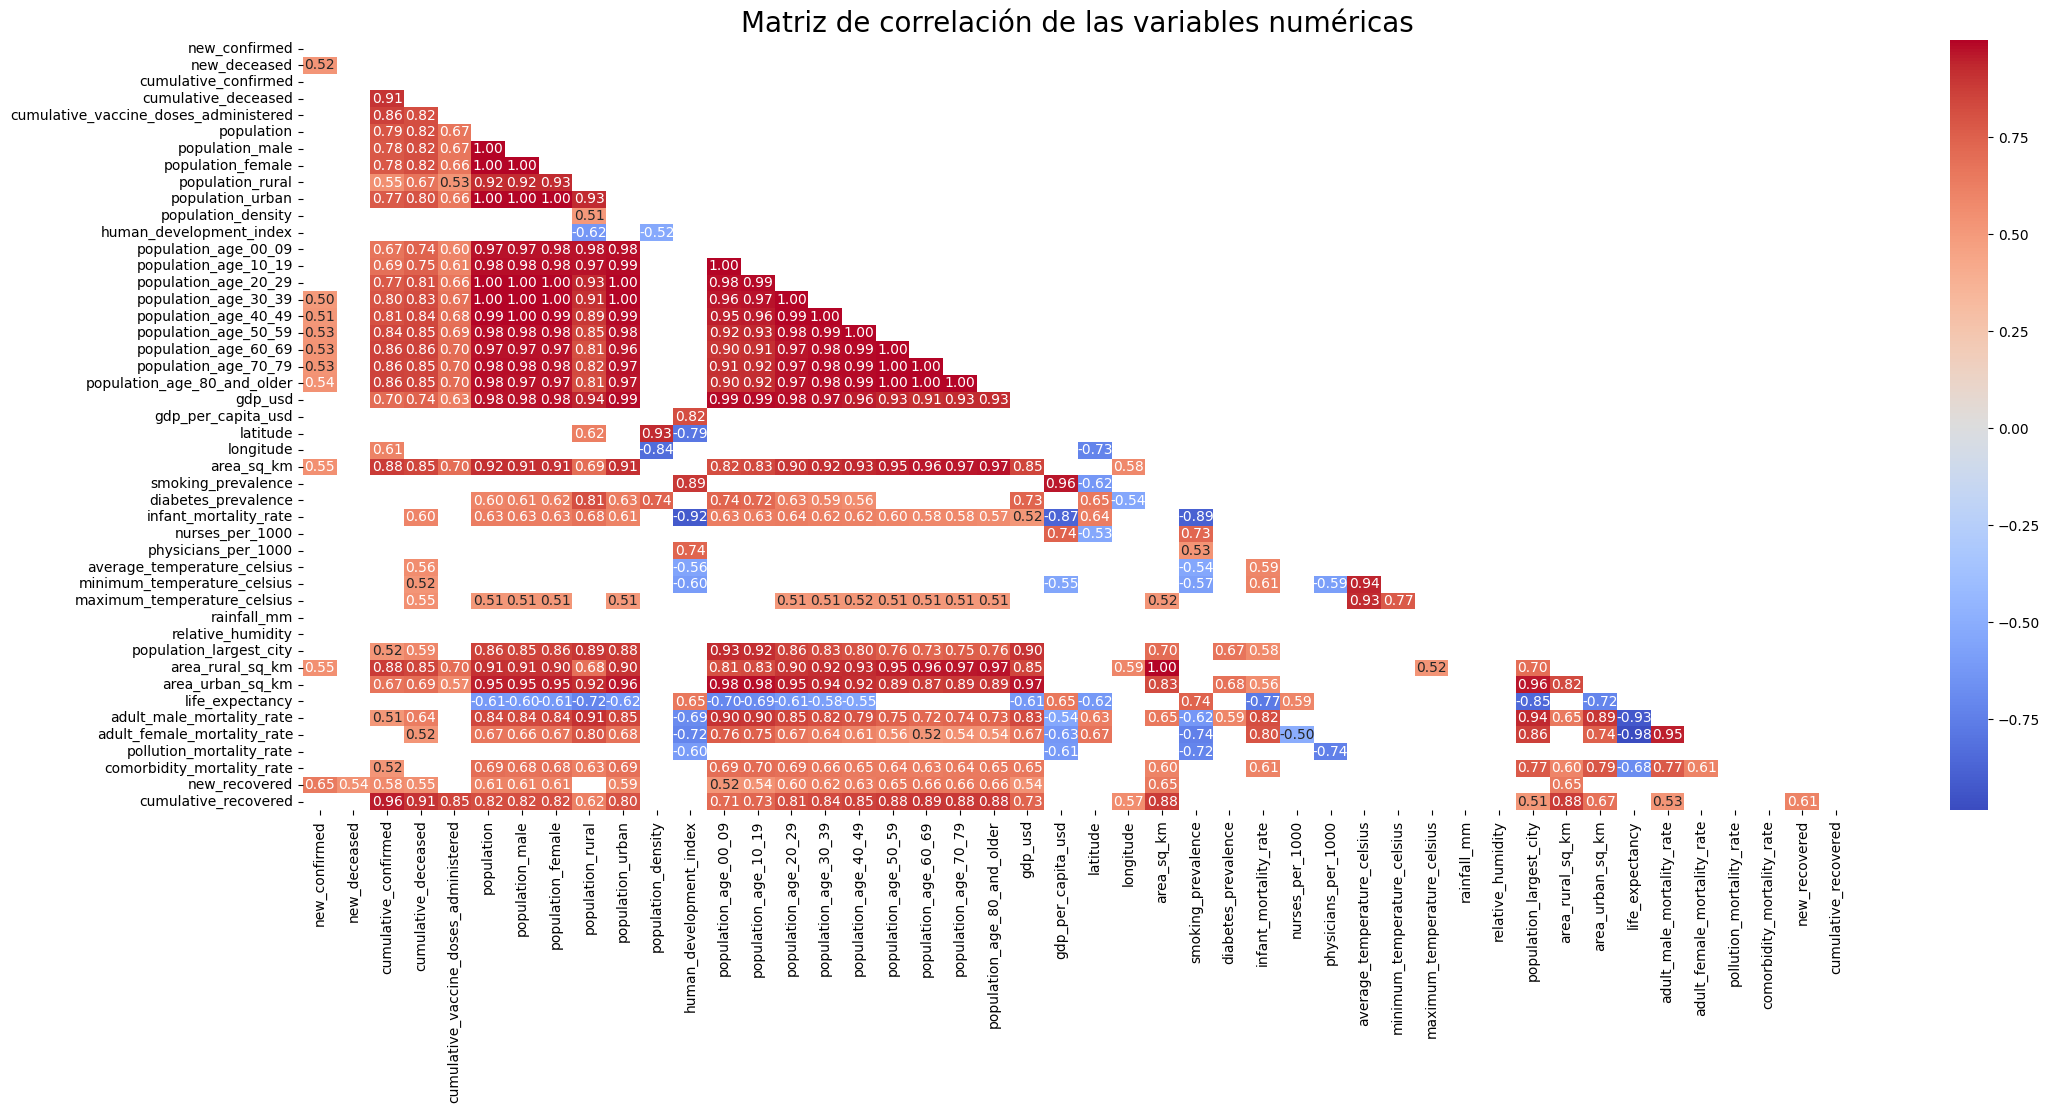

In [37]:
# Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()
# Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # np.triu nos da la parte inferior de nuestra matriz
# Vamos a mostrar valores superiores a 0.5 es decir donde hay una correlación fuerte sin embargo también se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de las variables numéricas", fontsize=20)
plt.show()

En la gráfica anterior se presentan las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.

Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

### Realizo personalización de colores solicitado en el punto 6

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palete = ['#87CEEB','#00FF7F','#00008B','#FFFF00', '#006400','#FF0000']

sns.set_palette(custom_palete)


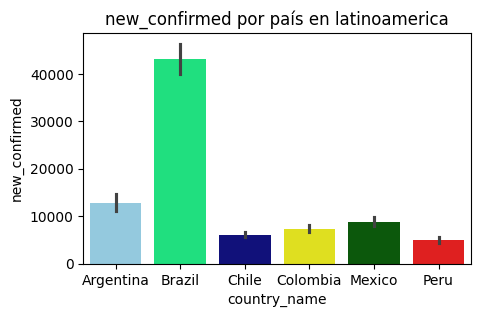

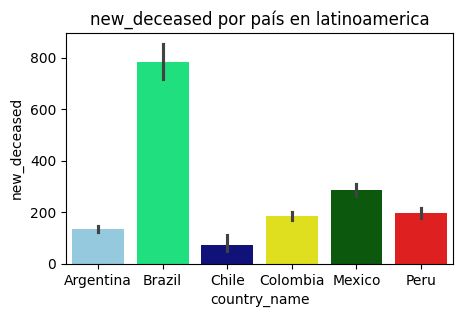

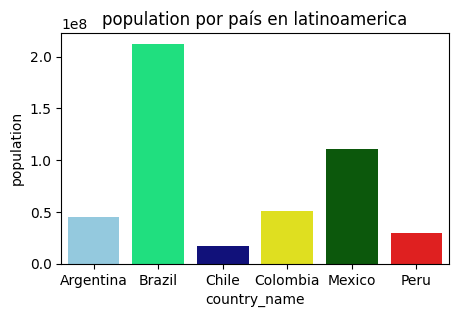

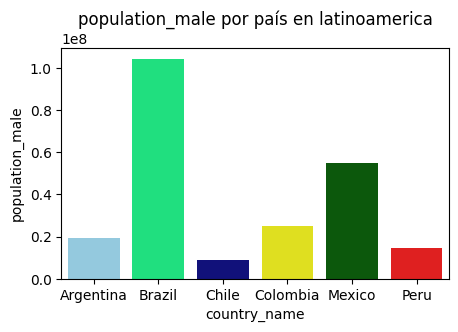

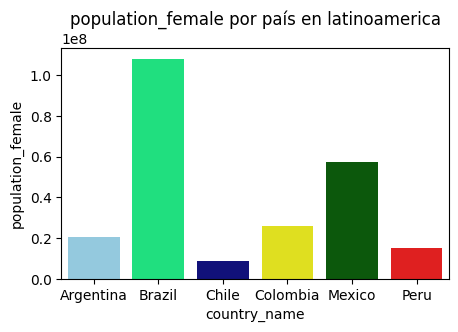

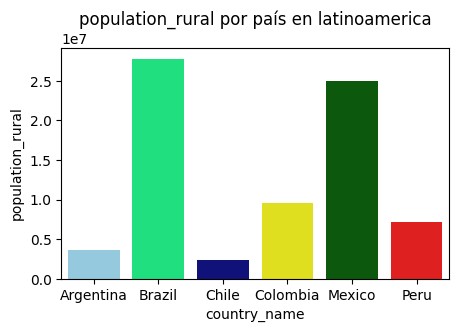

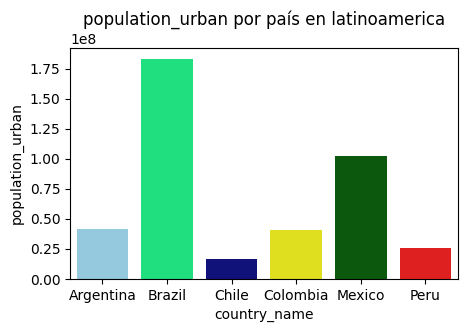

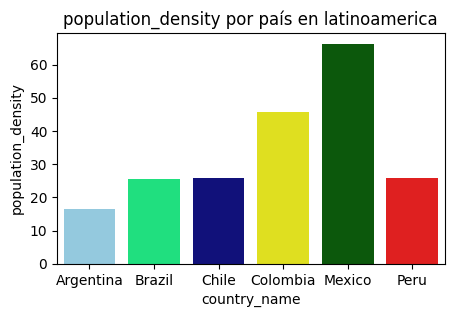

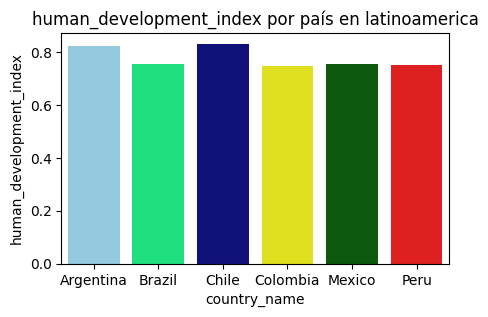

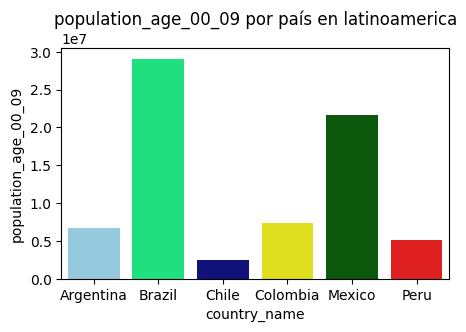

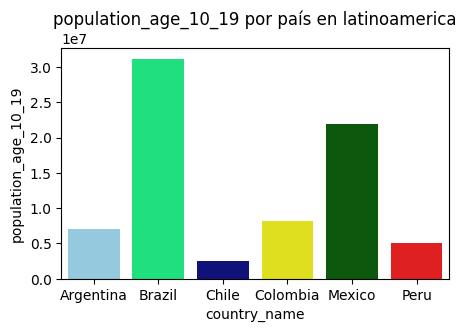

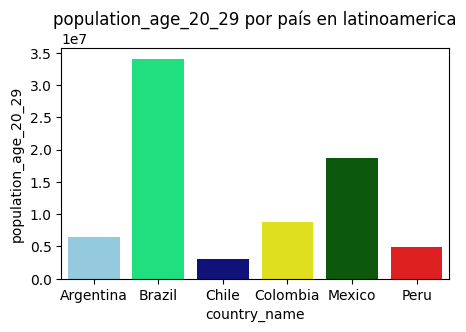

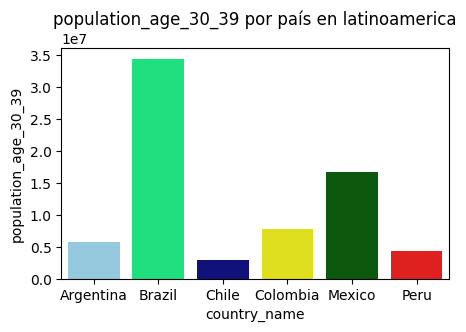

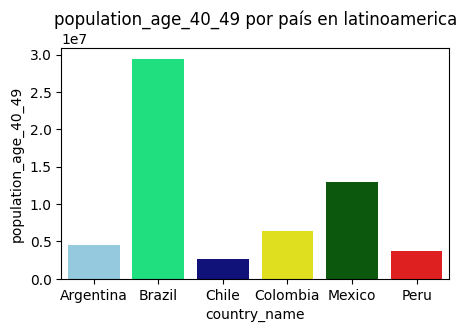

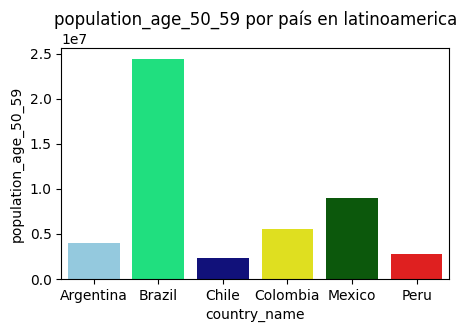

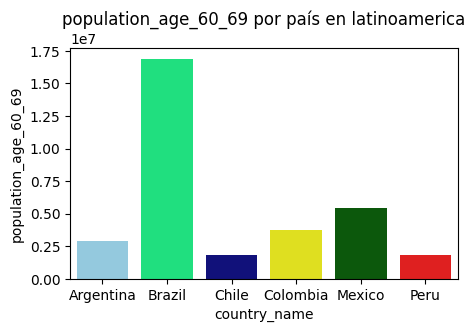

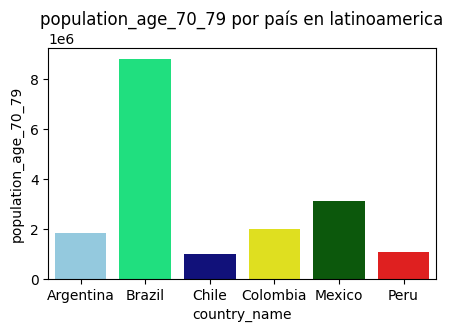

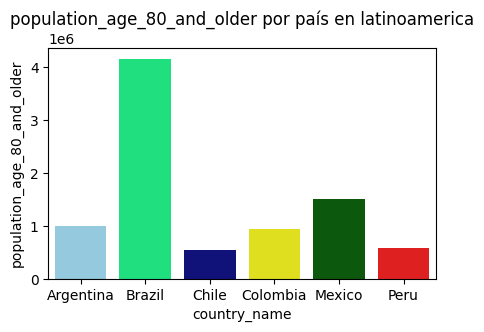

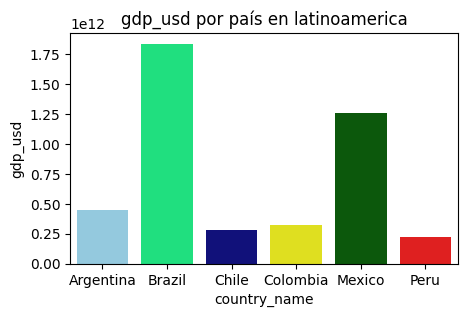

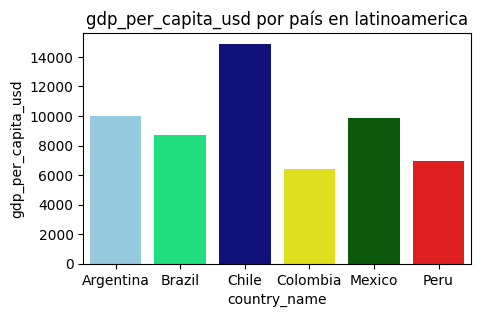

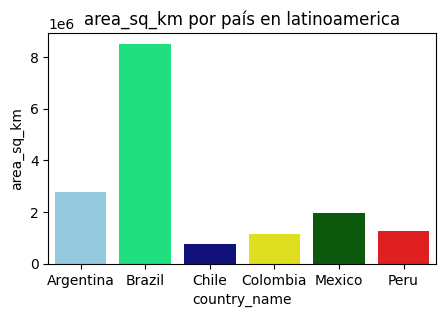

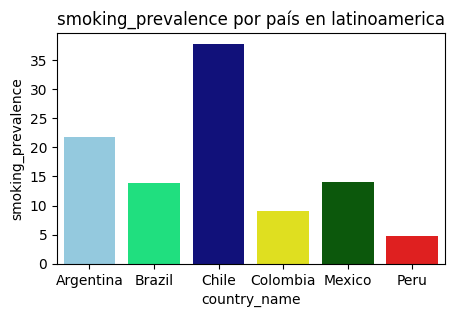

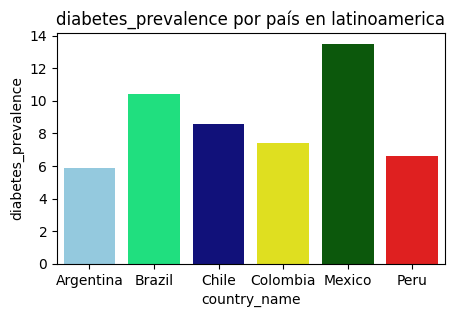

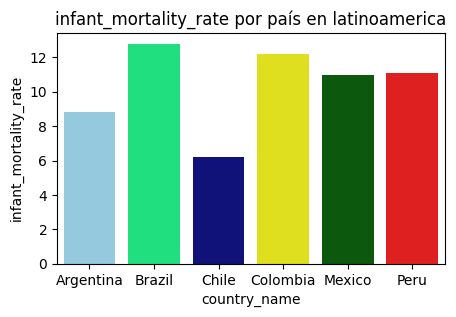

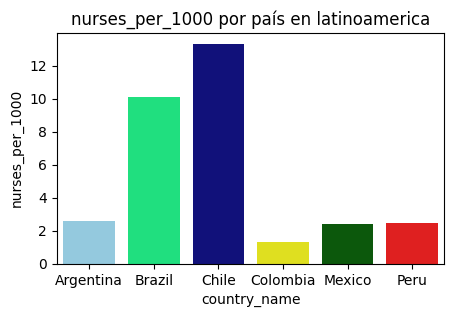

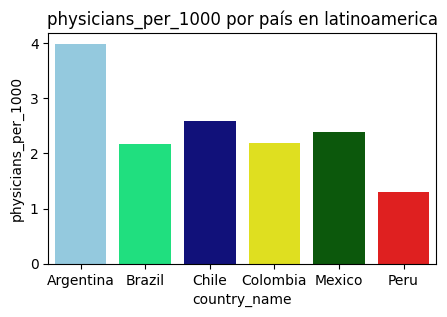

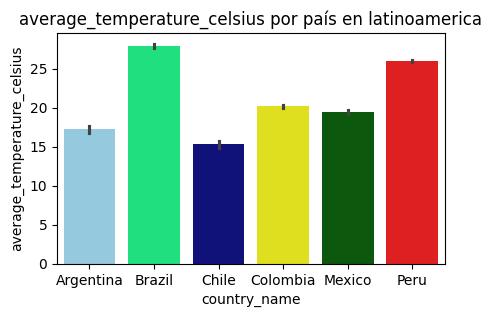

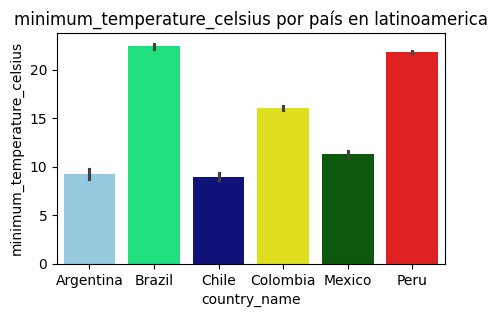

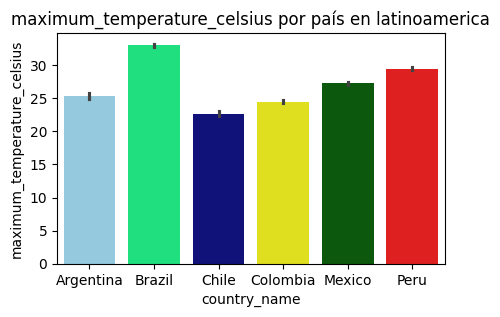

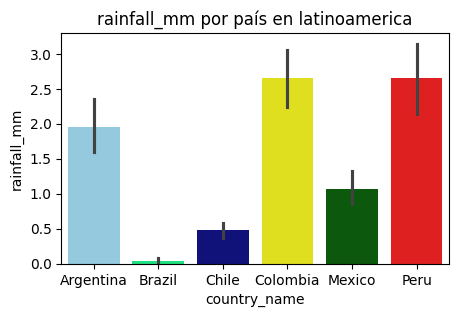

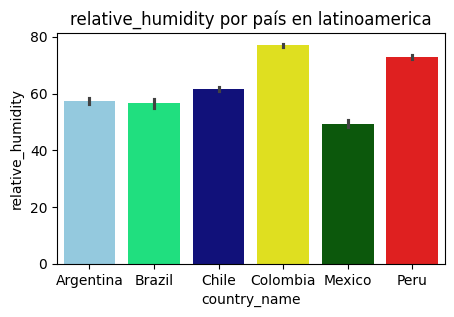

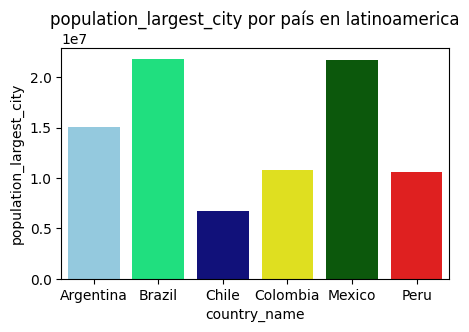

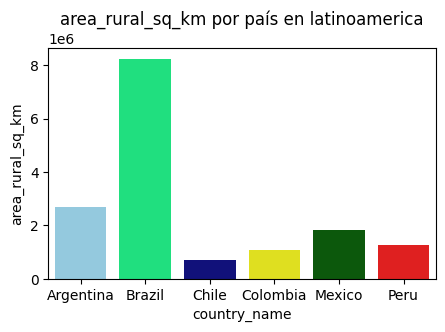

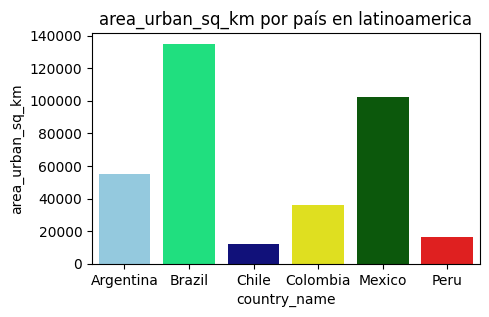

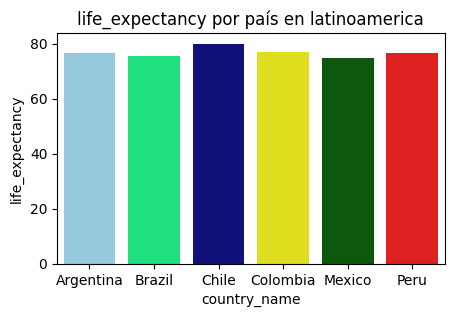

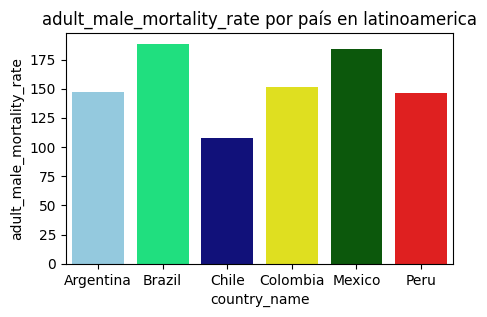

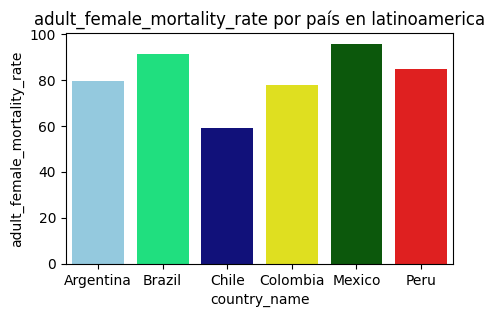

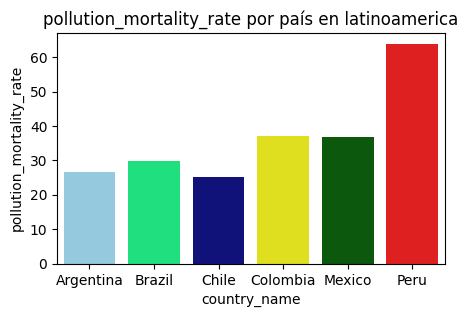

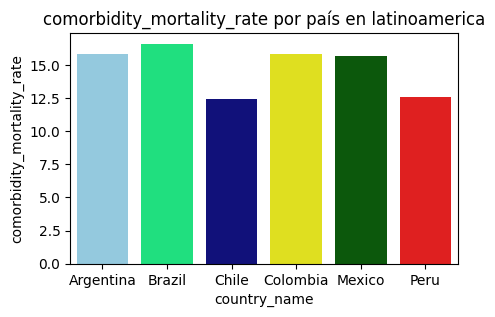

In [39]:
# diagrams bar for every country in data_latinoamerica_paises with 6 columns
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5,3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

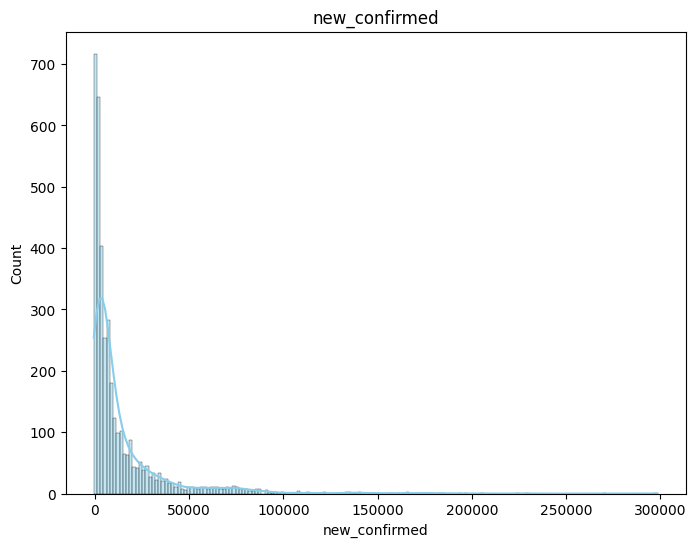

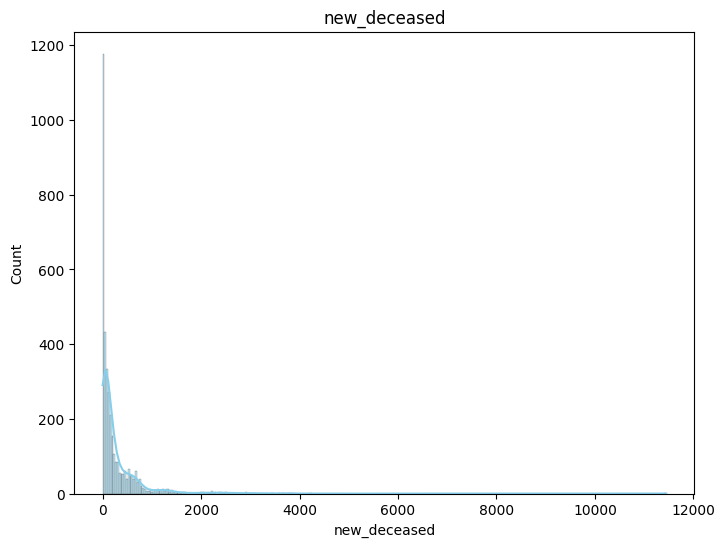

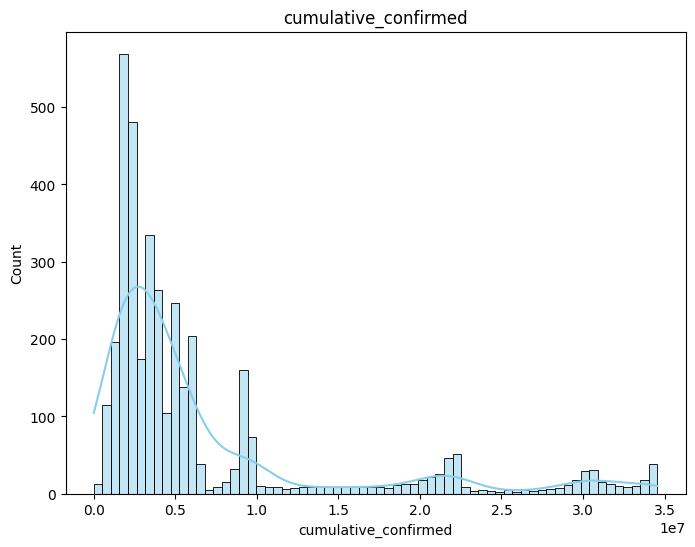

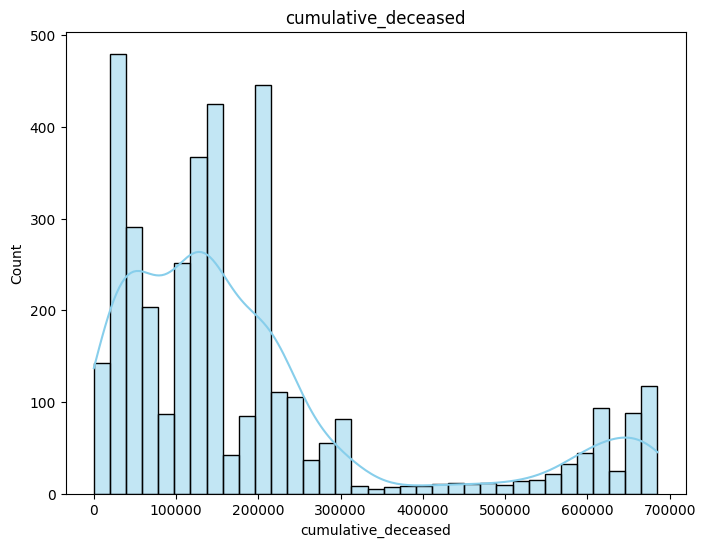

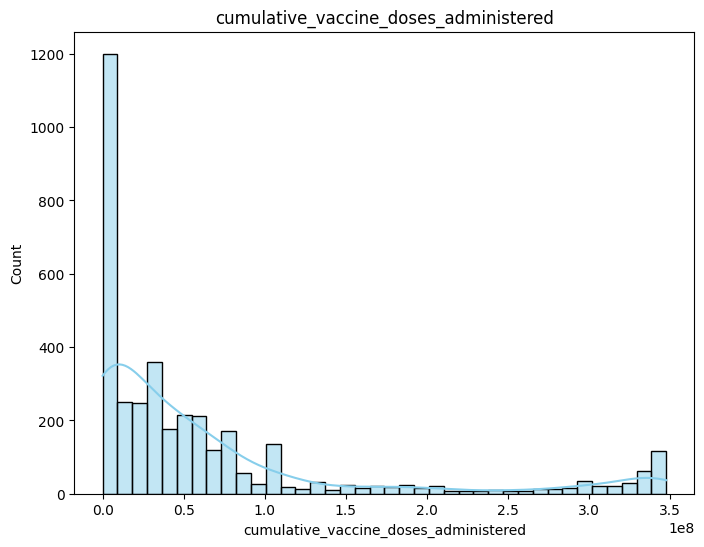

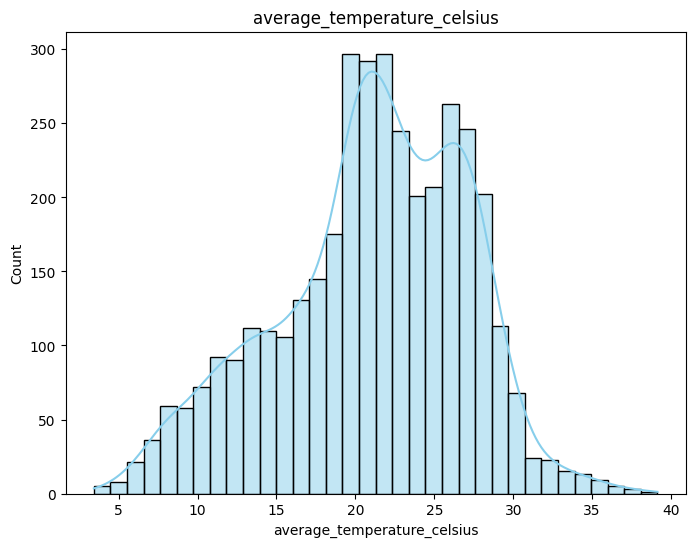

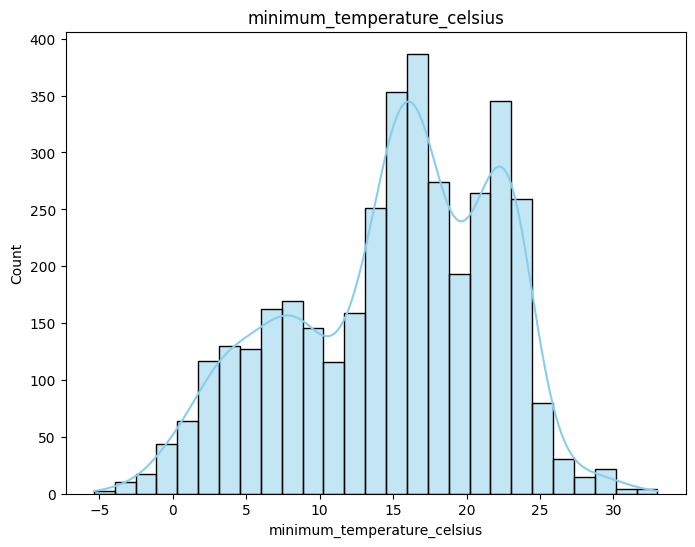

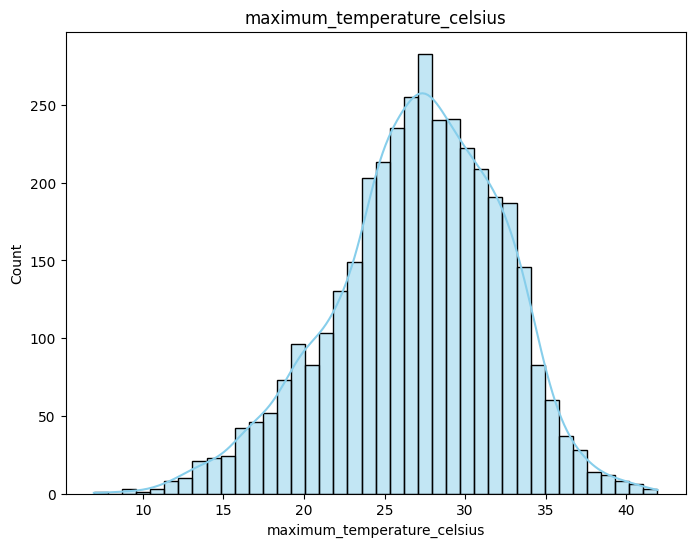

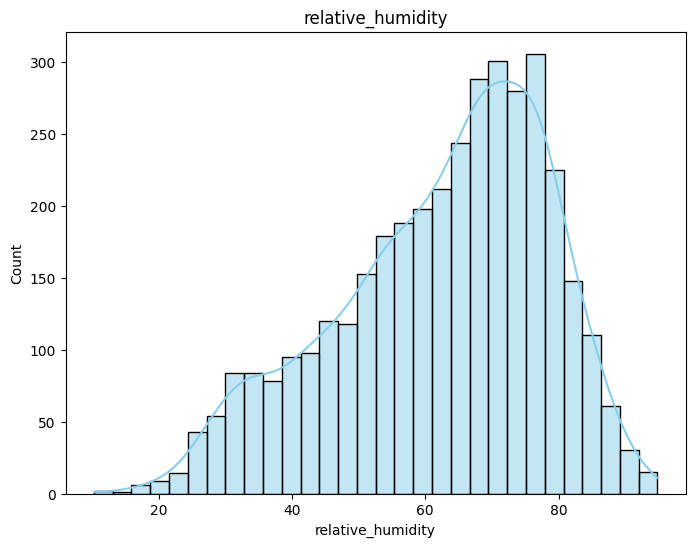

In [40]:
# Establecemos las columnas que vamos a analizar
lista_columnas_9=['new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased',
                  'cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius',
                  'maximum_temperature_celsius','relative_humidity']
# Crear histogramas de las variables numéricas, partiendo de las columnas establecidas
for i in data_latinoamerica_paises[lista_columnas_9]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()

Procederemos a realizar un análisis enfocados en algunas variables específicas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

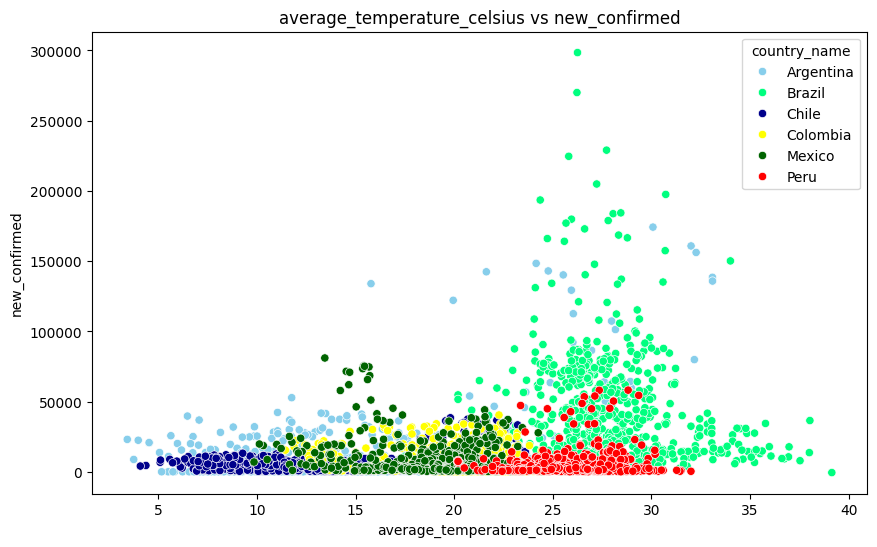

In [41]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Se ha podido observar que en algunos países la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros países si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.
Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

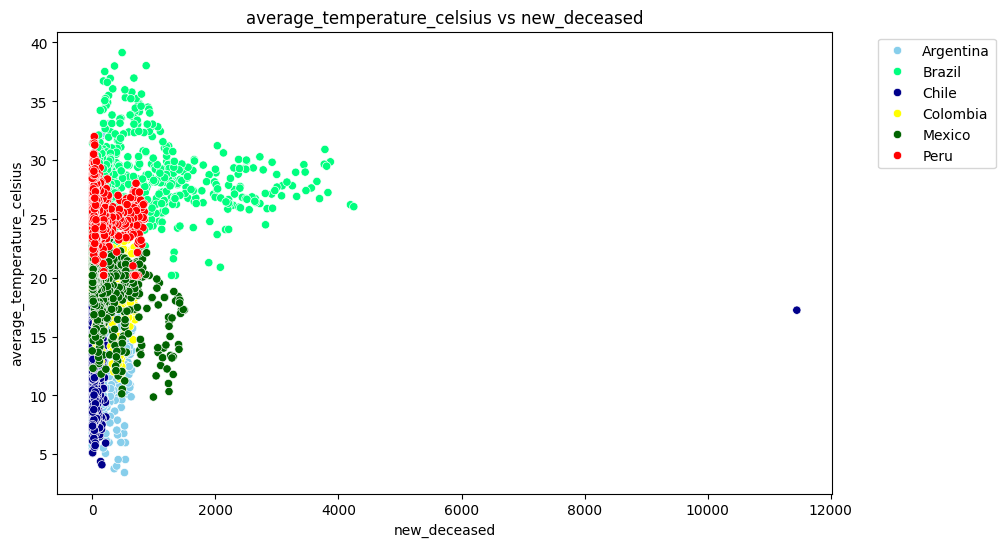

In [42]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En la gráfica anterior se ve un comportamiento similar al de los casos confirmados, en algunos países la temperatura no influye en la cantidad de muertes, sin embargo en otros países si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

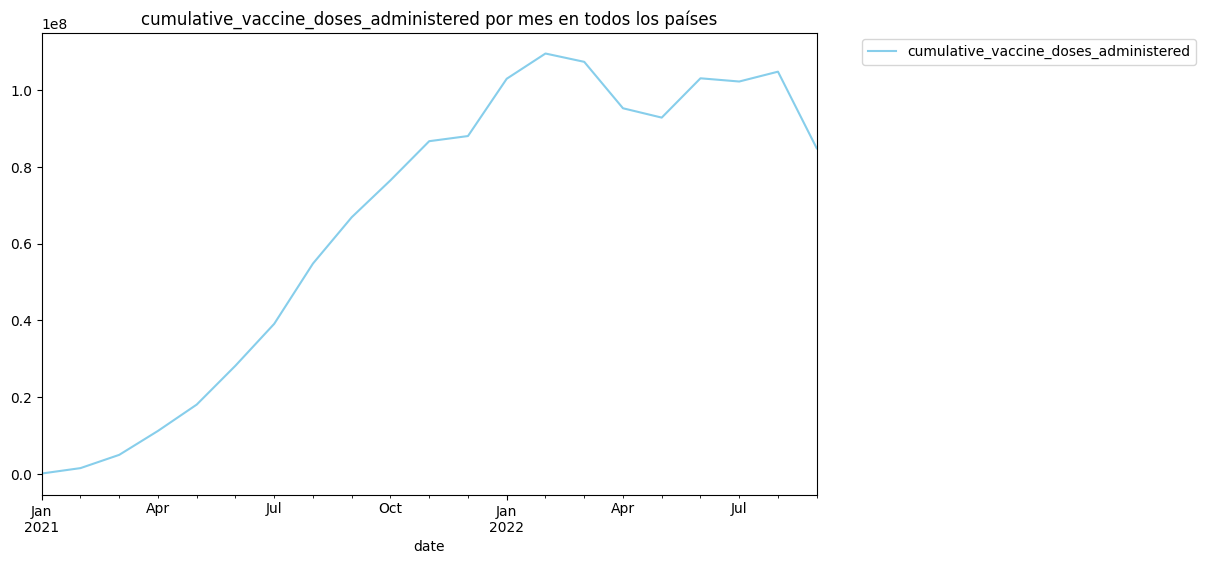

In [43]:
# Grafica de valores medios de todos los países cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes en todos los países')
plt.show()

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como la anterior gráfica no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

In [44]:
#Establecemos los paises del estudio
paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

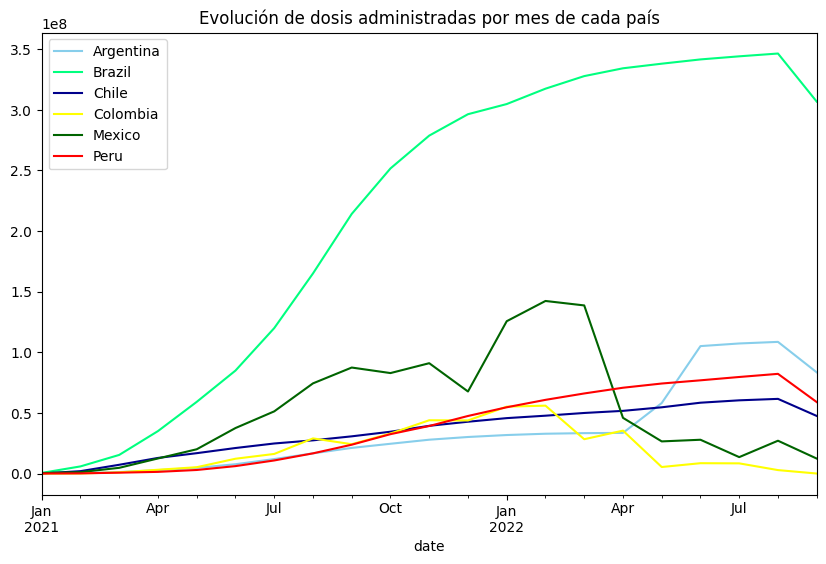

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos países la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros países la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

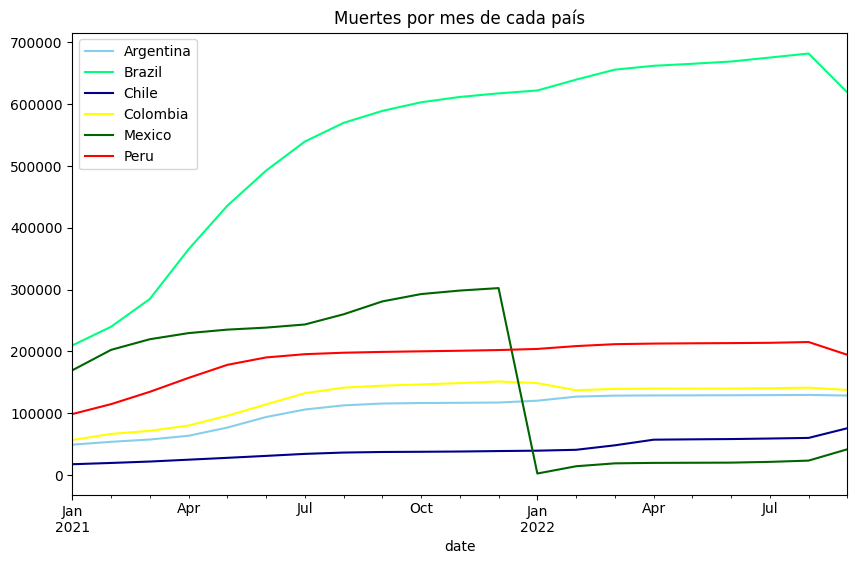

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos países sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes además de otros factores y cantidad de datos que tenemos.

La disminución de casos en México puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

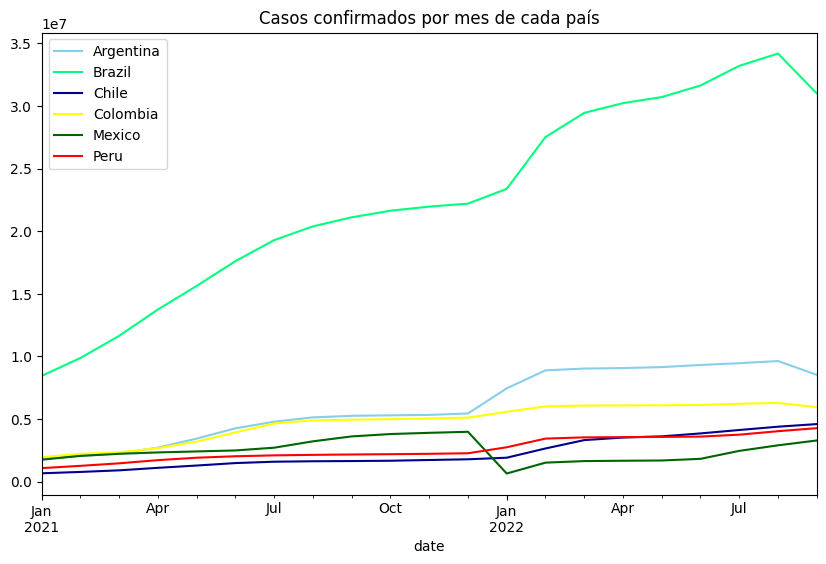

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaron peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

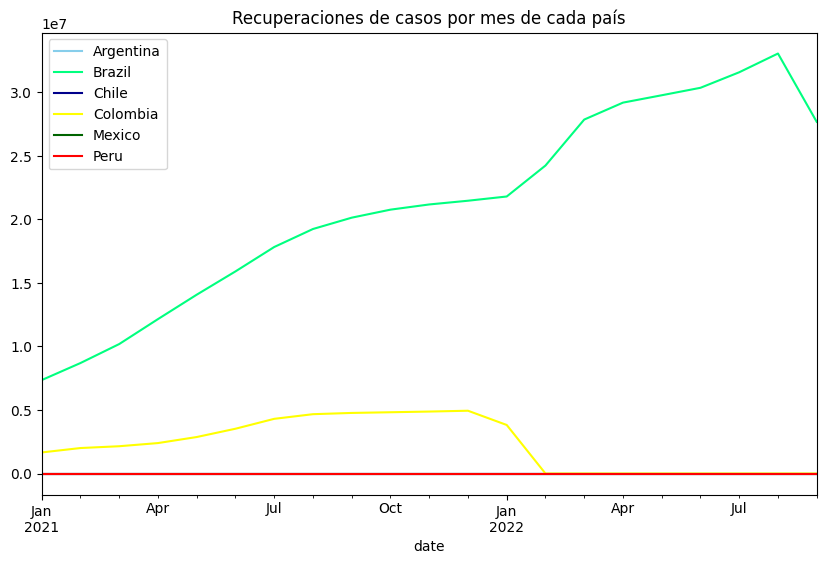

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

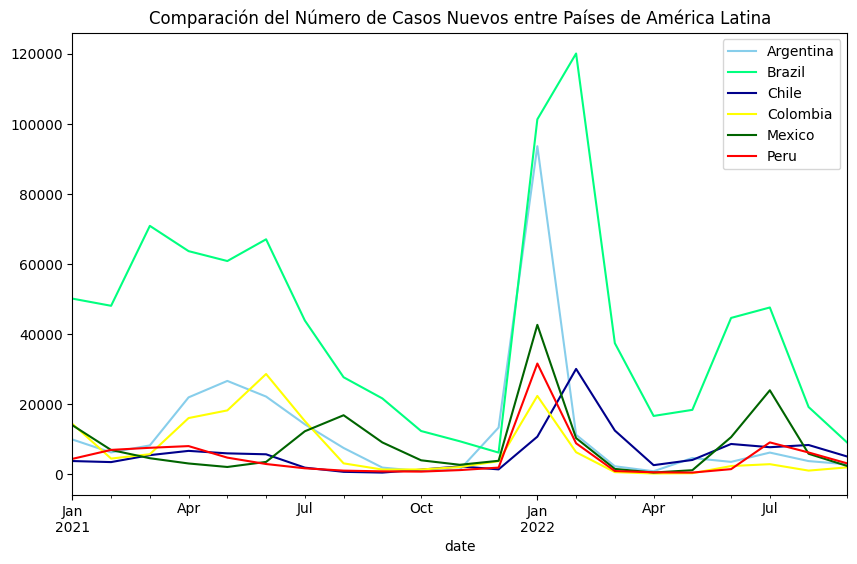

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('M').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los países que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos países además de no ser tan desproporcionada la cantidad de vacunas administradas.

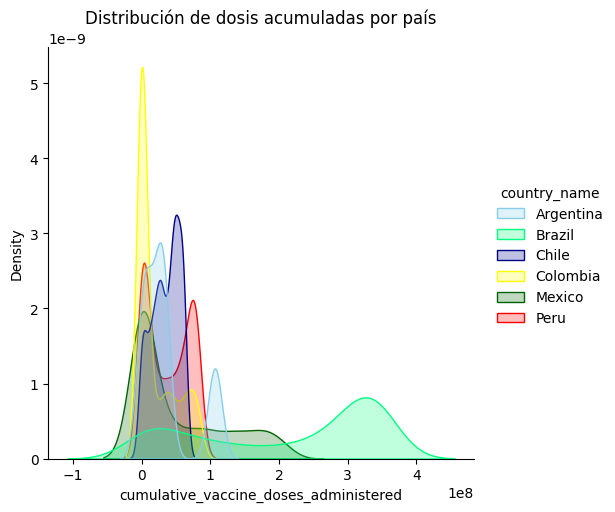

In [50]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.show()

De los países que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos países además de ser desproporcionada la cantidad de vacunas administradas.

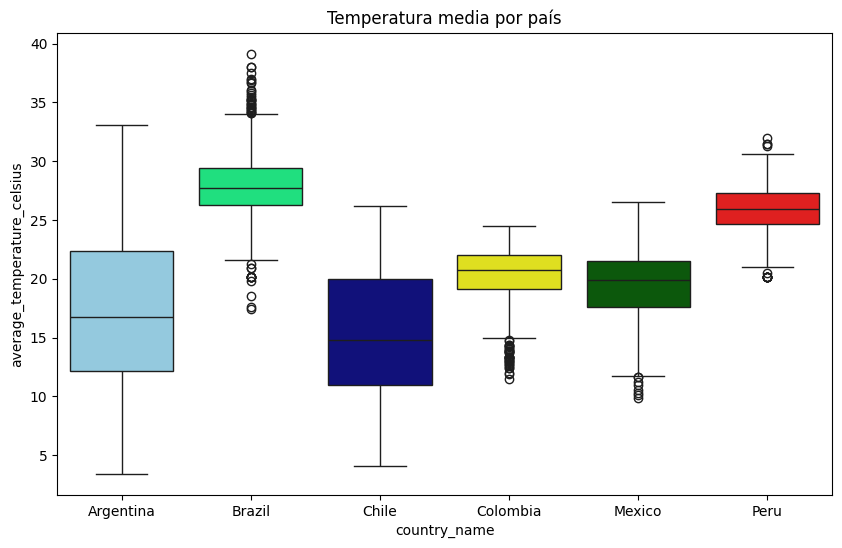

In [51]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país') # Temperatura mediana?
plt.show()

Aunque Chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que Chile ha manejado mejor la pandemia que los demás países.

Esto poco a poco nos ha llevado a concluir que los países donde los centros serán donde hay más casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y en estudio de los datos para poder tomar una decisión más acertada. Seguiremos viendo cómo se comportan las variables de a través de violinplots.

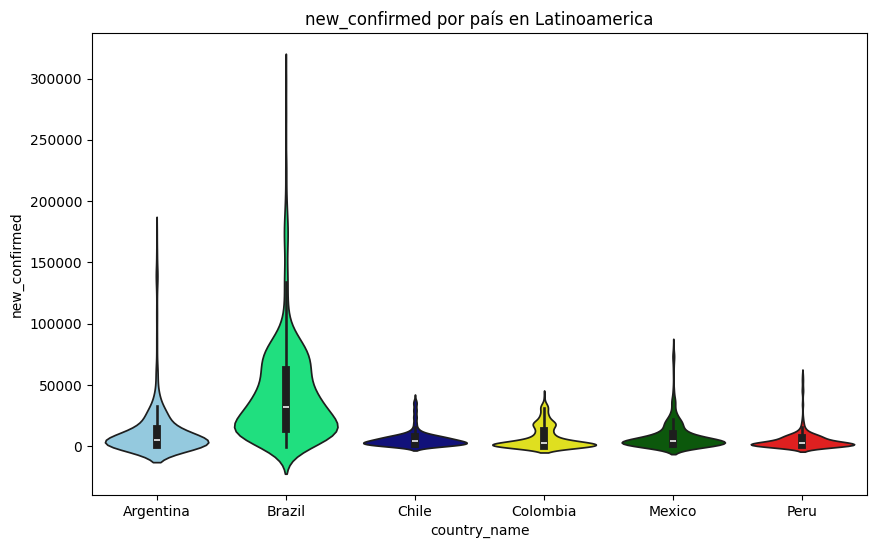

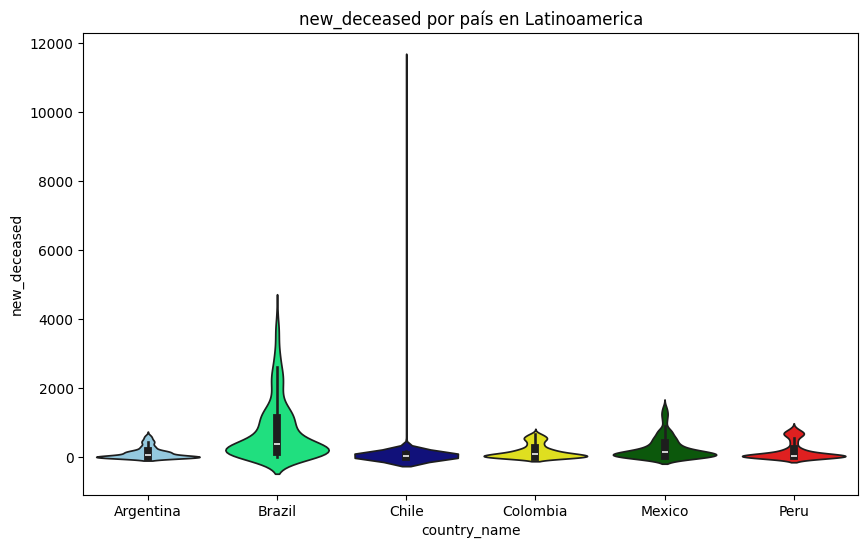

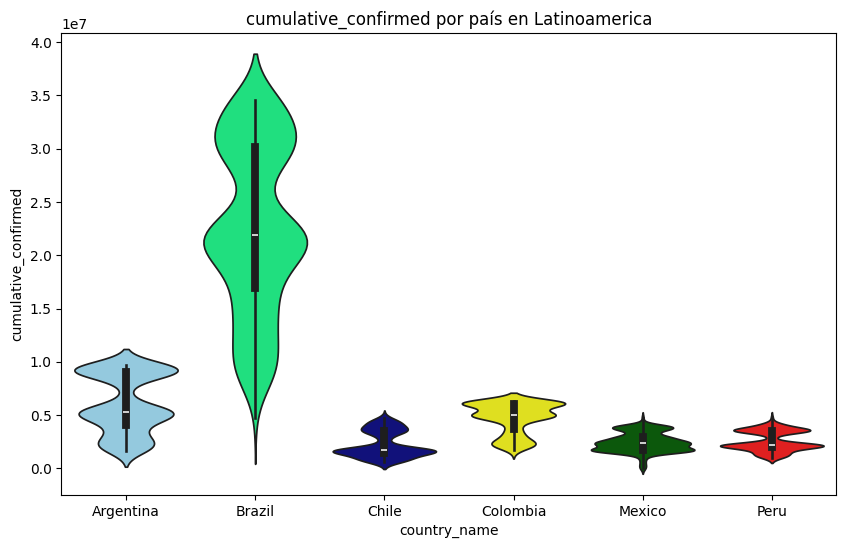

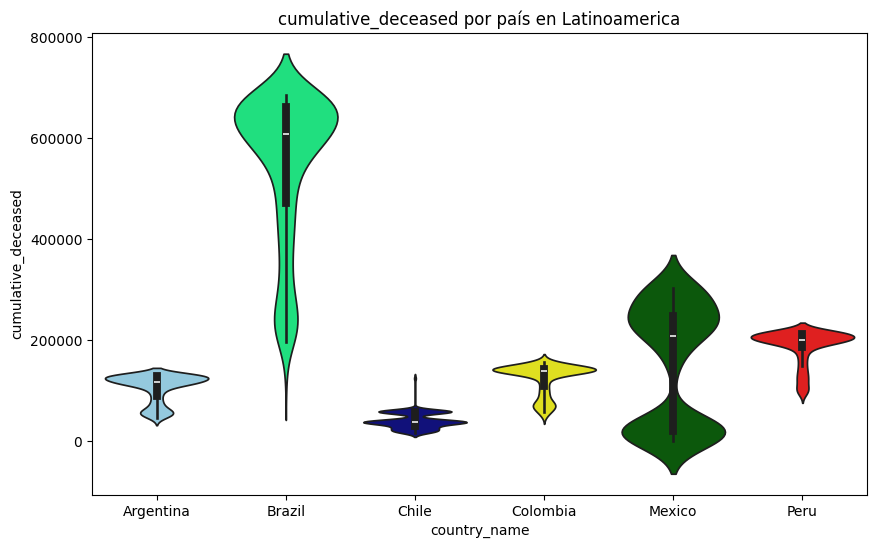

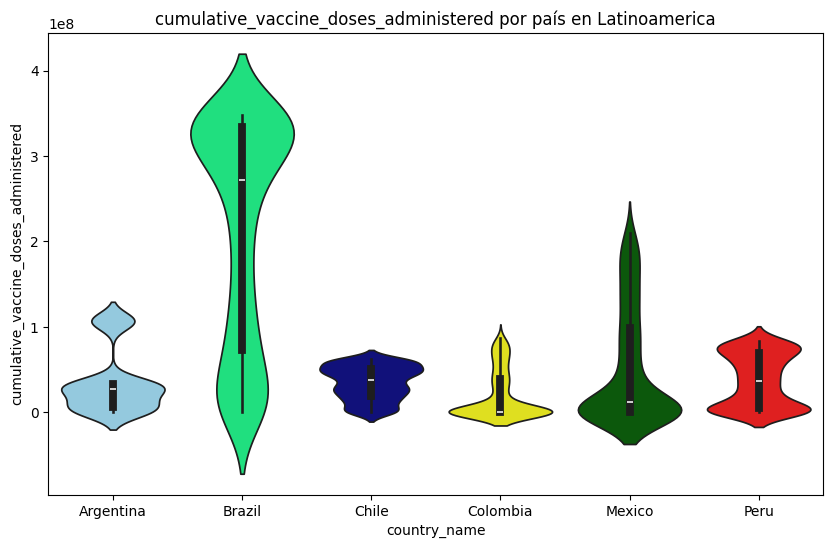

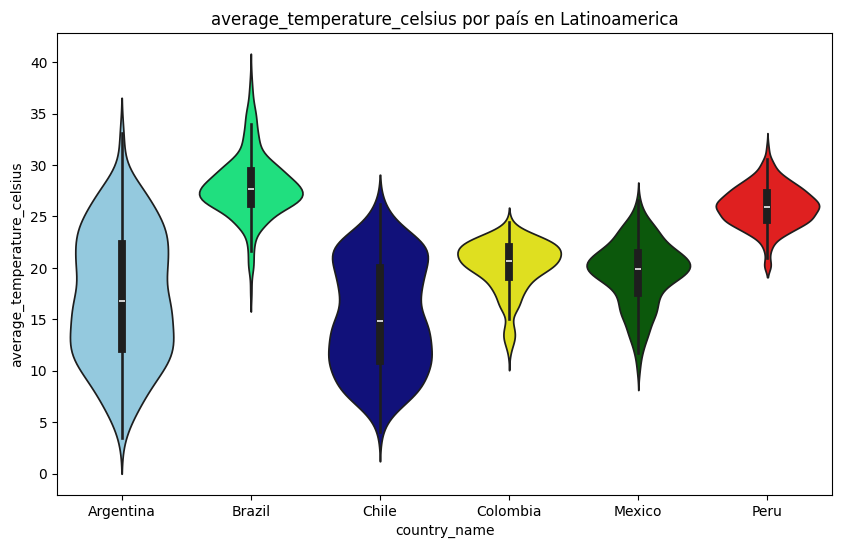

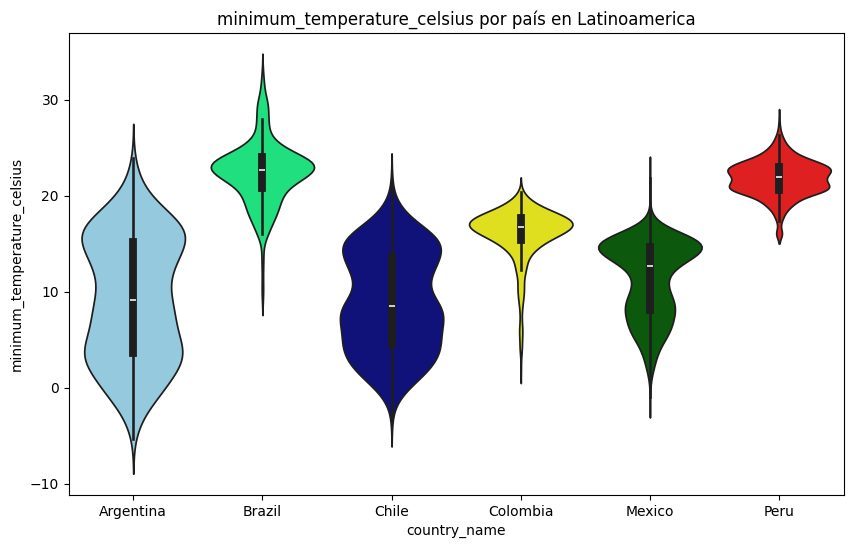

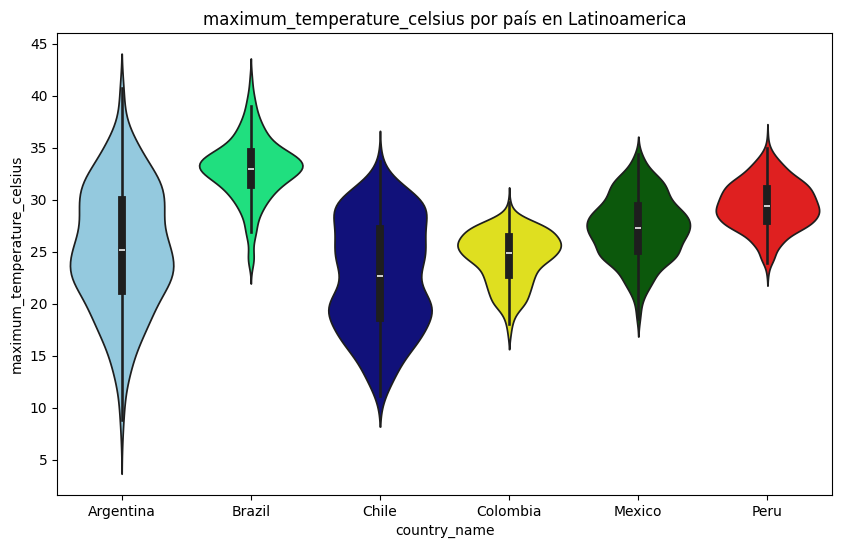

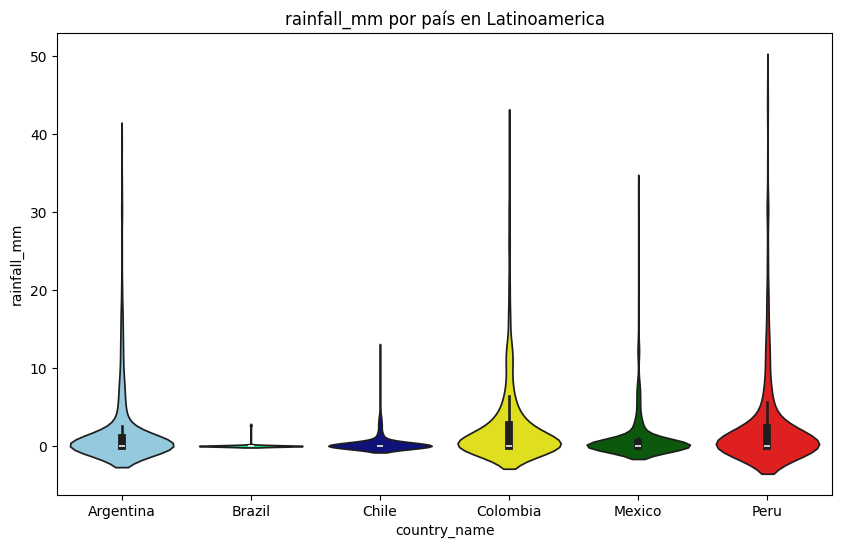

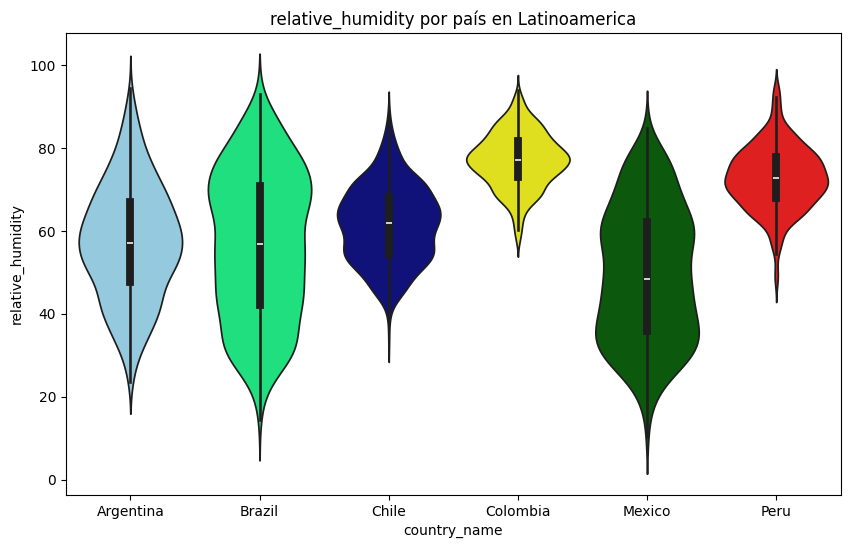

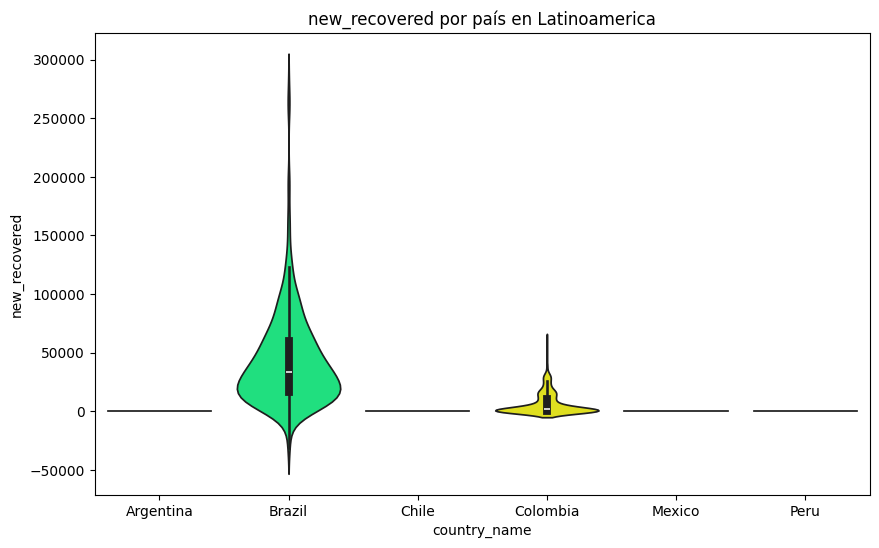

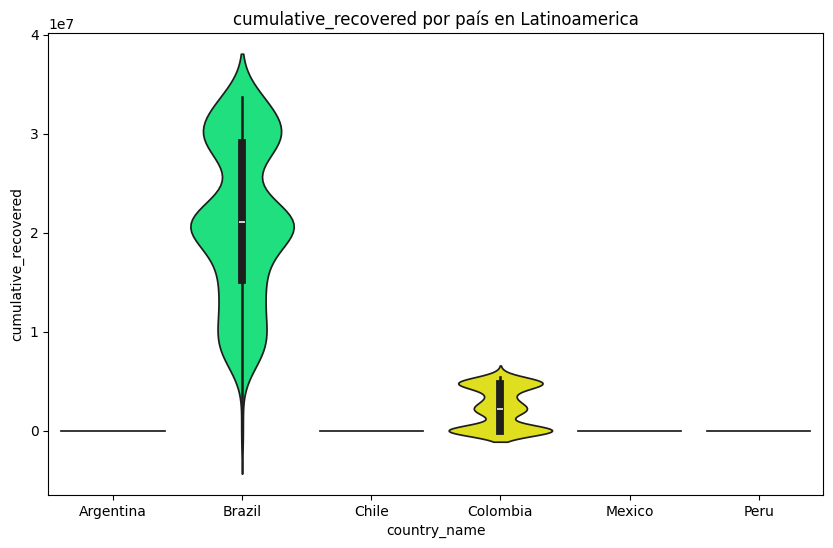

In [52]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en Latinoamerica')
        plt.show()


Procedamos a analizar la distribución de la población por grupos de edad en los países seleccionados, para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

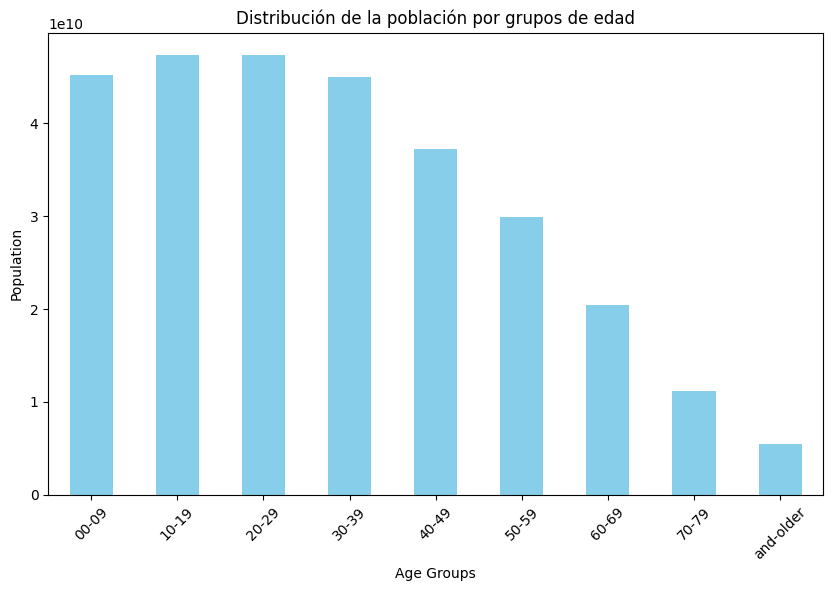

In [53]:
# Calculamos la distribucion de la poblacion por grupos de edad
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)
plt.show()

Esta gráfica nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario. Podemos observar que los grupos de edades mas representativos son los de 10-19 y 20-29, seguido del de 00-09.

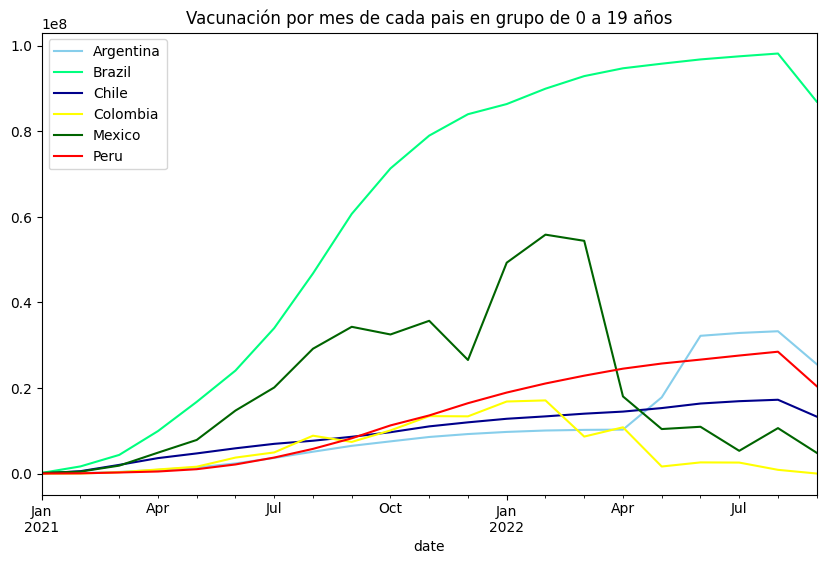

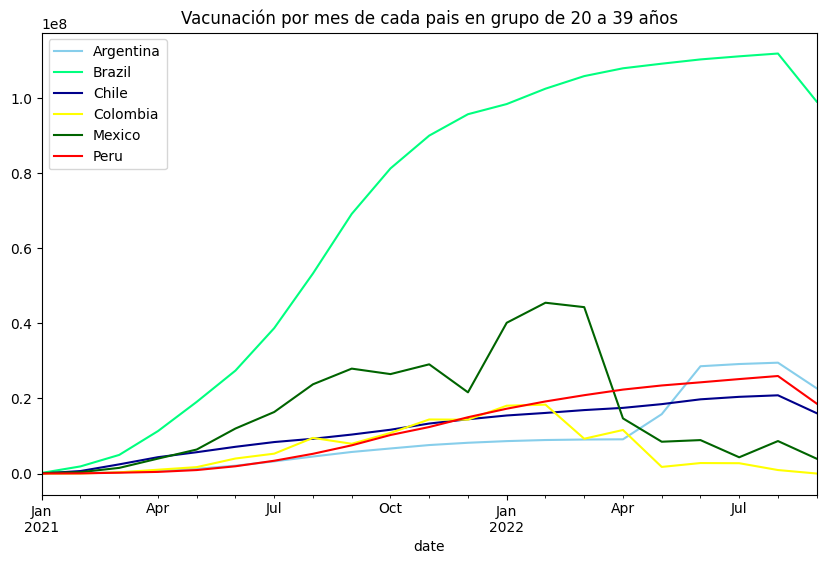

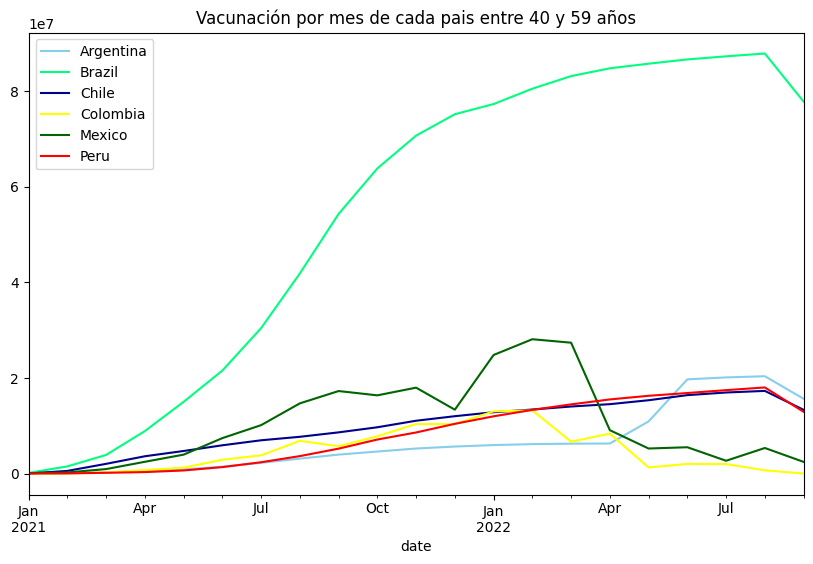

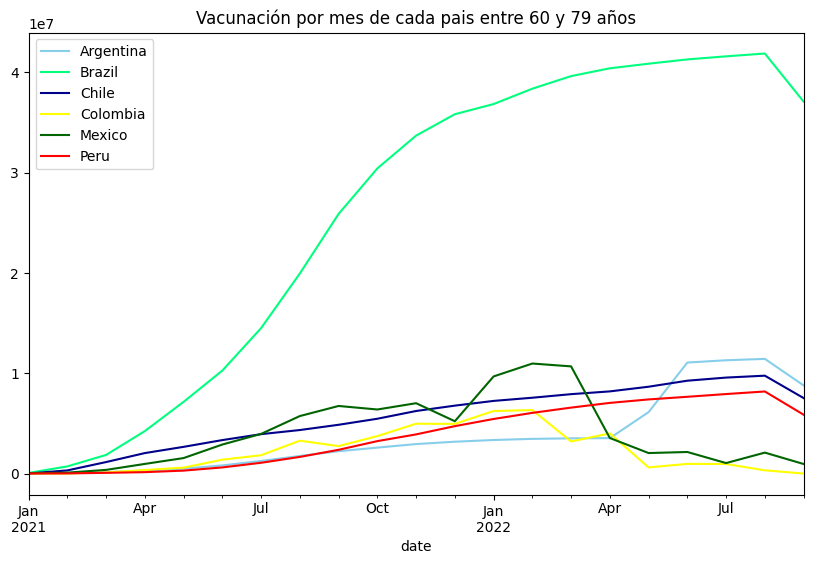

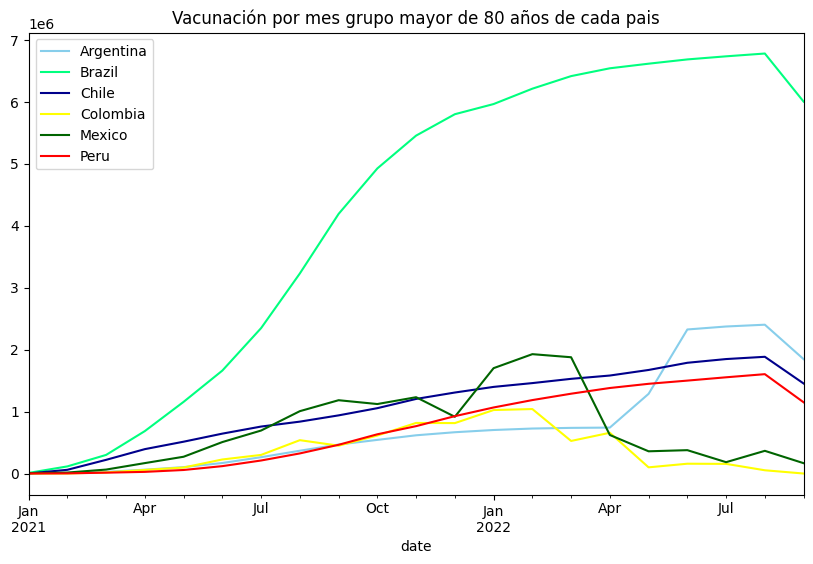

In [54]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

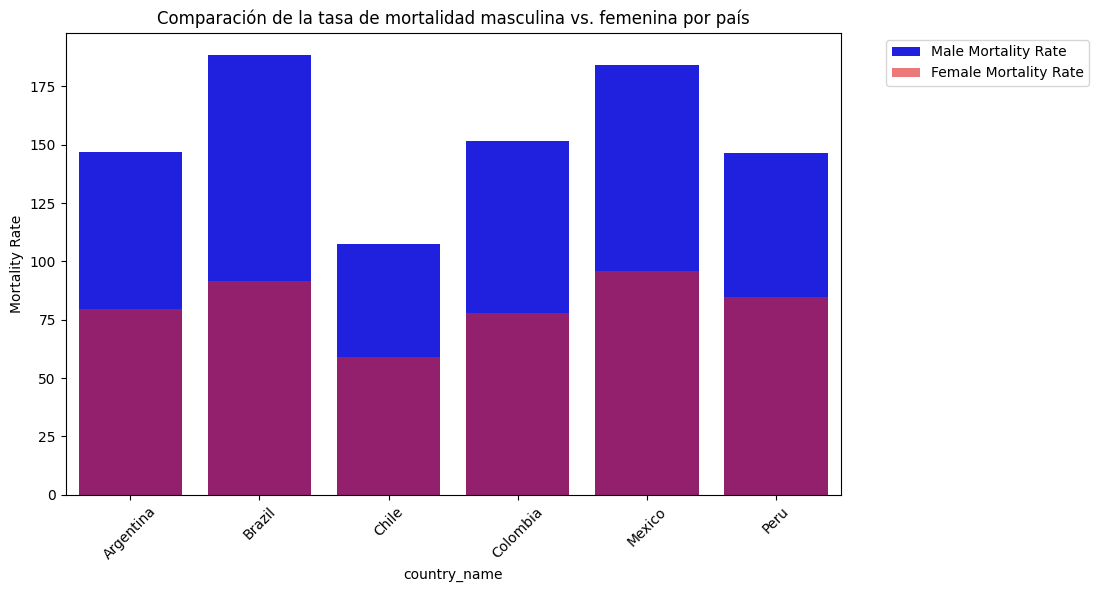

In [55]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

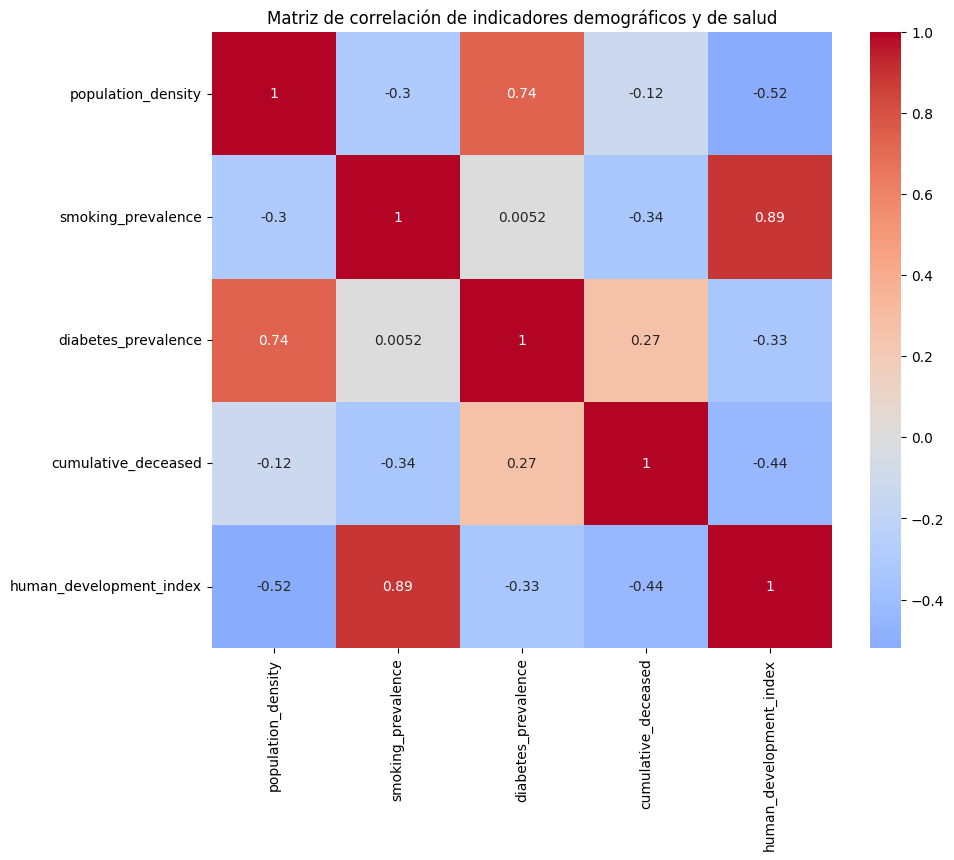

In [56]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

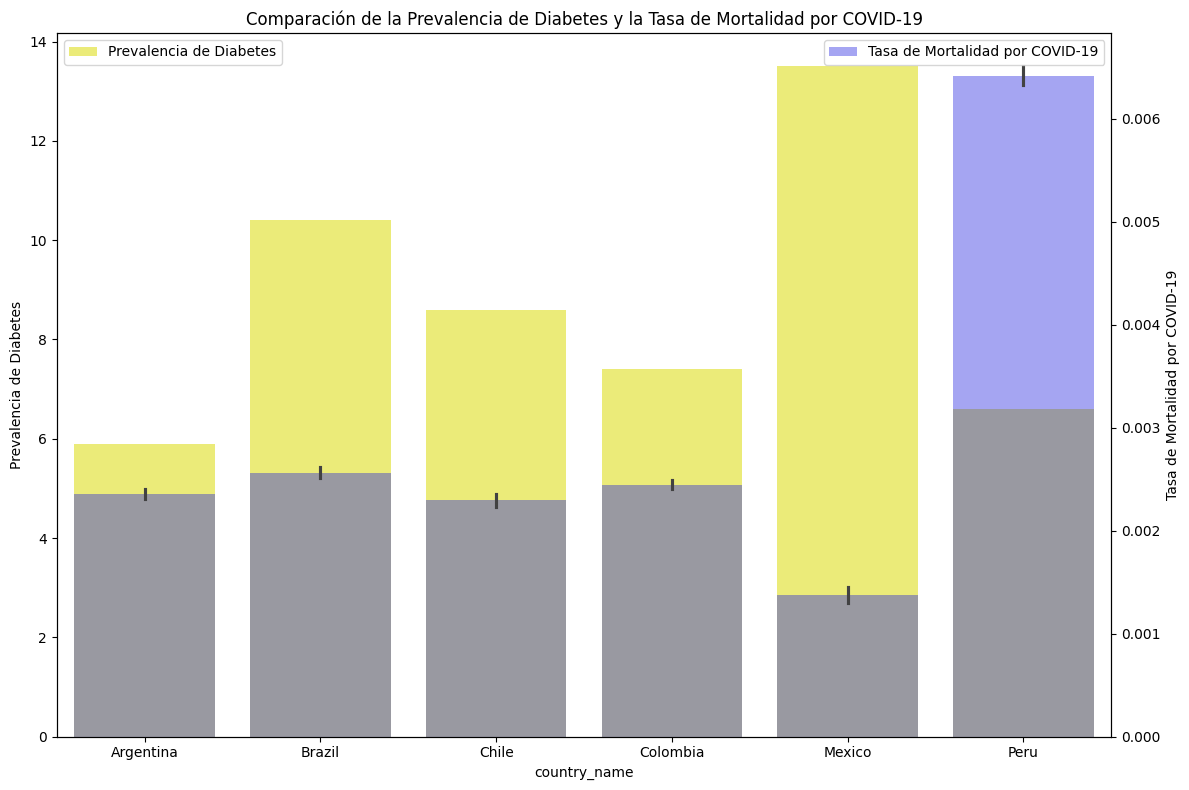

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

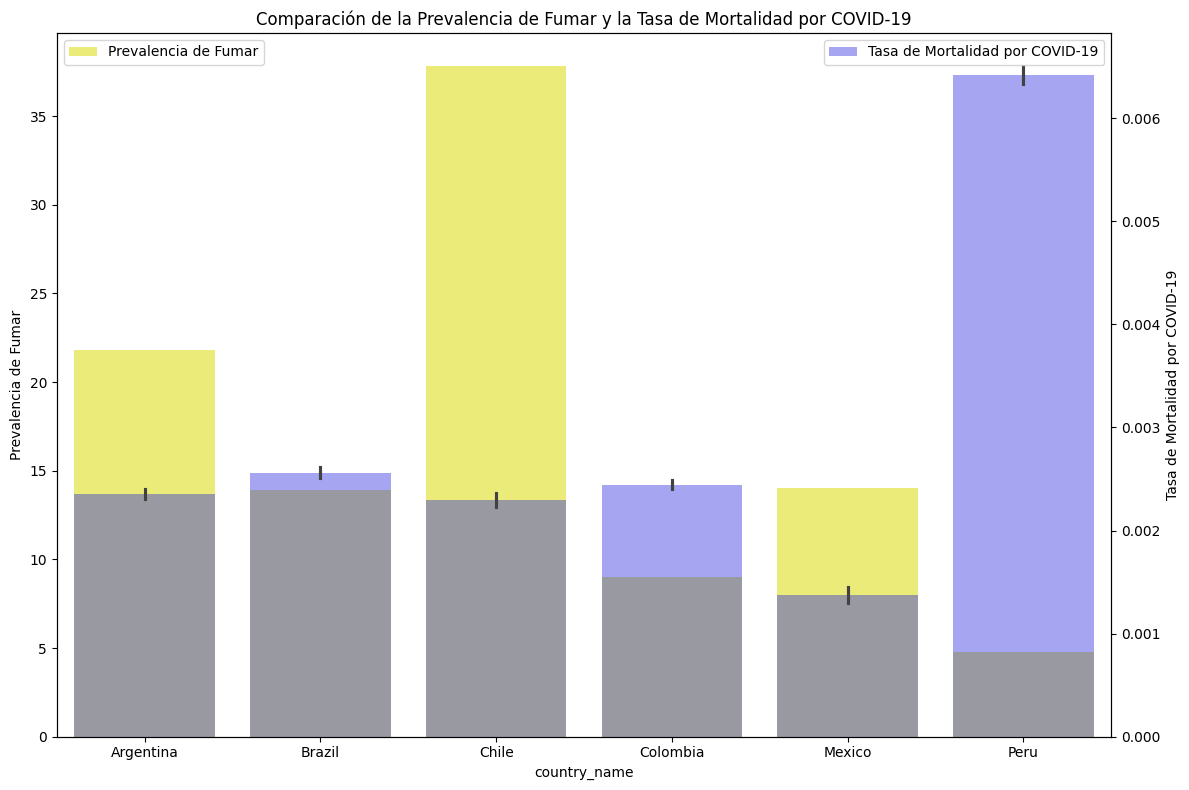

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

5. **Identificación de Tendencias y Patrones:** Deberás analizar detalladamente los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación, buscando identificar tendencias a largo plazo y patrones estacionales o geográficos. Por ejemplo, puedes investigar la posible influencia de factores como la temperatura en la propagación de la enfermedad, así como también examinar cómo varían los índices de vacunación en diferentes regiones o en distintos momentos del año. Este análisis te permitirá prever áreas de alta prioridad para la asignación de recursos y la implementación de medidas preventivas y de control.

Para abordar el punto 5 del Avance 2 sobre la "Identificación de Tendencias y Patrones", realizamos un análisis detallado de los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación. Este análisis se centró en identificar tendencias a largo plazo, patrones estacionales o geográficos, y la posible influencia de factores externos como la temperatura en la propagación de la enfermedad.

6. **Personalización de Visualizaciones:** Personaliza las visualizaciones para hacerlas más informativas y atractivas. Esto incluirá ajustar paletas de colores, añadir etiquetas y leyendas, tamaño, y utilizar títulos descriptivos para cada gráfico.

In [59]:
# Se realizó la perzonalizacion de colores mediante este paso:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palete = ['#87CEEB','#00FF7F','#00008B','#FFFF00', '#006400','#FF0000']

sns.set_palette(custom_palete)

# Avance 3

EDA con Numpy y Pandas

En este penúltimo avance del proyecto, te adentrarás en un análisis más profundo y sofisticado de los datos relacionados con la incidencia de COVID-19. Tu objetivo en este avance será pulir y preparar nuestros datos para una visualización avanzada que te permita identificar con precisión las ubicaciones más estratégicas para la expansión de los laboratorios farmacéuticos. Este paso te acercará a ofrecer recomendaciones basadas en datos sólidos que podrán guiar eficazmente las decisiones de inversión de la empresa.

Consignas

### 1 Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 2 coloca el título: “Avance 3”

### 2 Importa las librerías que necesites utilizar en este avance.

In [60]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib  # Para poder establecer la version que se maneja, aunque no es necesario importar
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [61]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #Utilizamos para evitar advertencias

### 3 Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [62]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

In [63]:
# Ponemos como índice la columna "date" para poder hacer un análisis de los datos a lo largo del tiempo.
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True) # inplace=True transforma directamente sin necesidad de copiar
# en lugar de hacerlo data_latinoamerica_paises['date'] = data_latinoamerica_paises.set_index('date')
#Esto ya fue realizado en el avance 2

In [64]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [65]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  

In [66]:
#Creo una columna de tipo week aprovechando que tengo un index tipo datetime
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week # Nos devuelve en terminos iso el numero de semana
#Utilizo el metodo icosalender e invoco el atributo week
data_latinoamerica_paises                                                              

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar groupby.

In [67]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]

data_latinoamerica_paises_2021


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [68]:
# Realizo un nuevo DataFrame agrupado por 'country_name' y por 'week'. Va a agarrar los casos nuevos confirmados y las nuevas muertes
#  y la va a sumar bajo los criterios establecidos (en groupby) y va a resetear el indice, es decir va a ser por defecto.
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana.
Los primeros charts van a ser cómo evolucionan los casos de COVID en América Latina a lo largo del tiempo por semana, y para eso creamos la variable semana. Para eso creamos nuestro dataset agrupado a nivel semanal y por países. ¿Cómo vamos a hacer esto? Vamos a graficar una serie de charts, dos charts en particular. Cada chart va a trazar una línea por cada uno de los países.

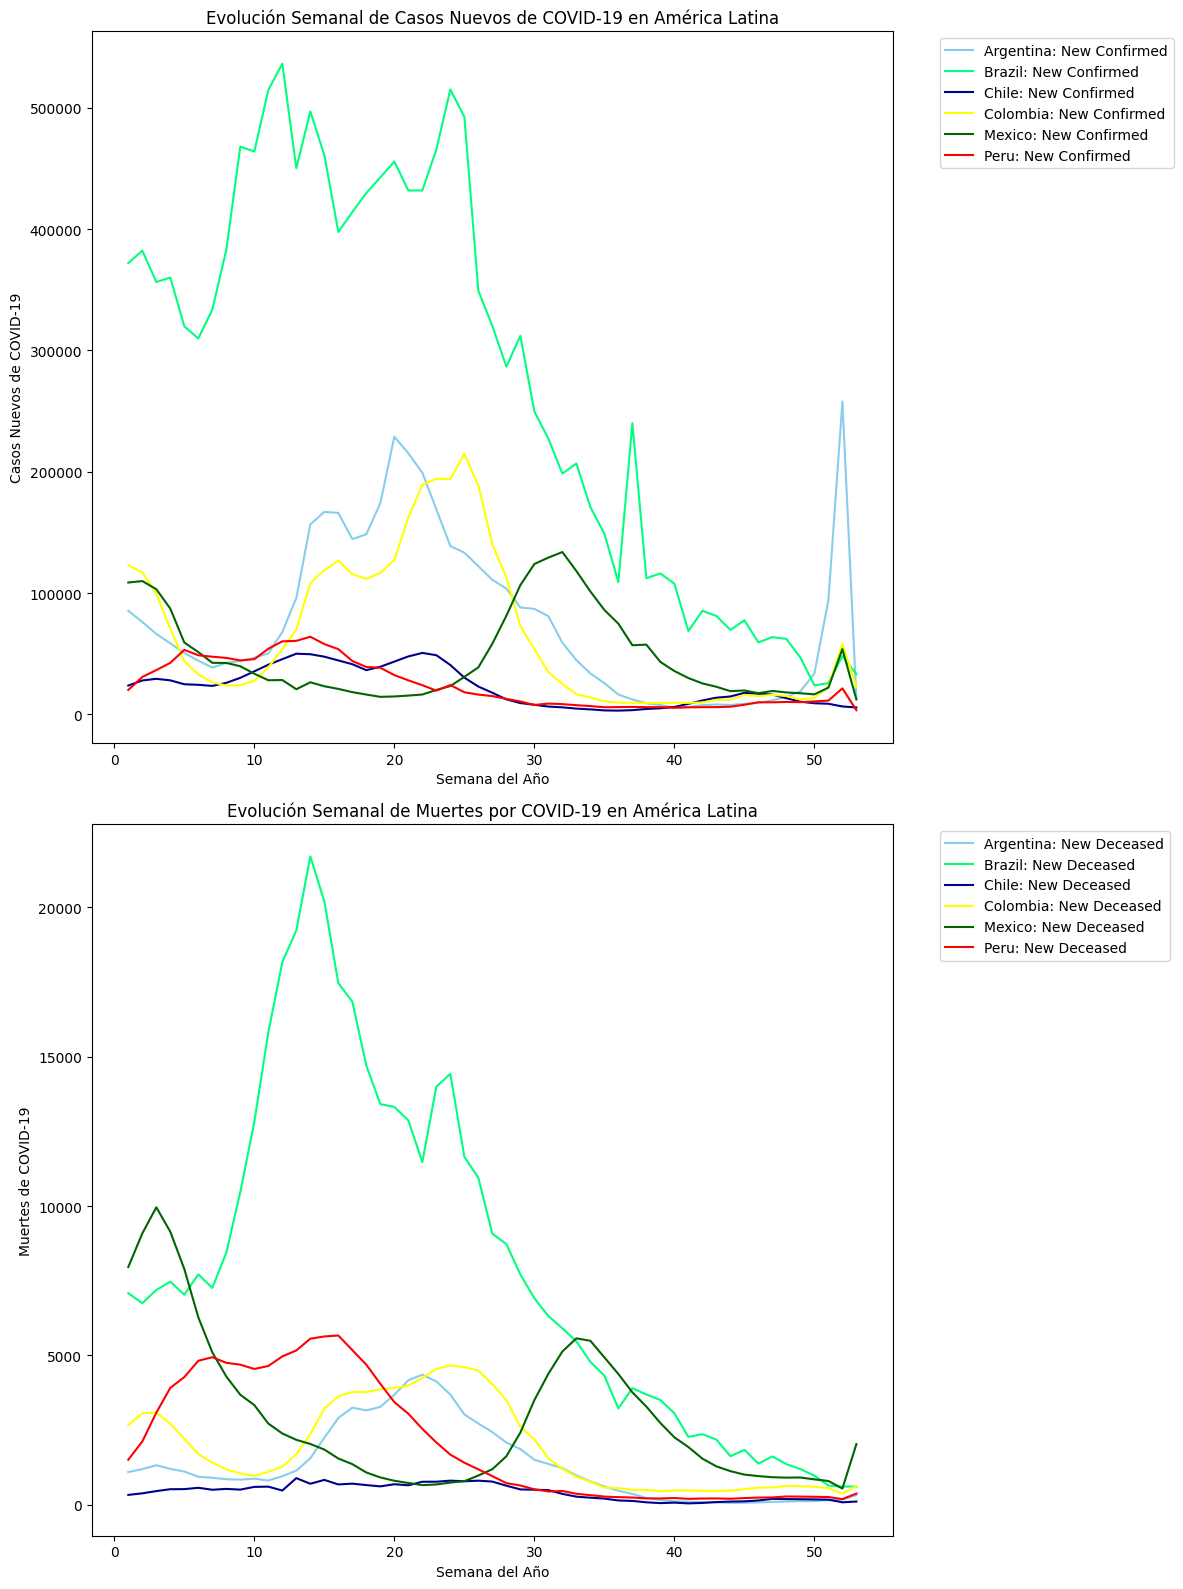

In [69]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16)) # Mejor (12,8)? Una columna dos filas
for country in weekly_cases['country_name'].unique(): # Podriamos haber generado el listado de paises, unique los saca sin repetirlos
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country}: New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country}: New Deceased')

# Etiquetas
ax[0].set_xlabel('Semana del Año')
ax[0].set_ylabel('Casos Nuevos de COVID-19')
ax[0].set_title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Semana del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Semanal de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11528\325822579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore


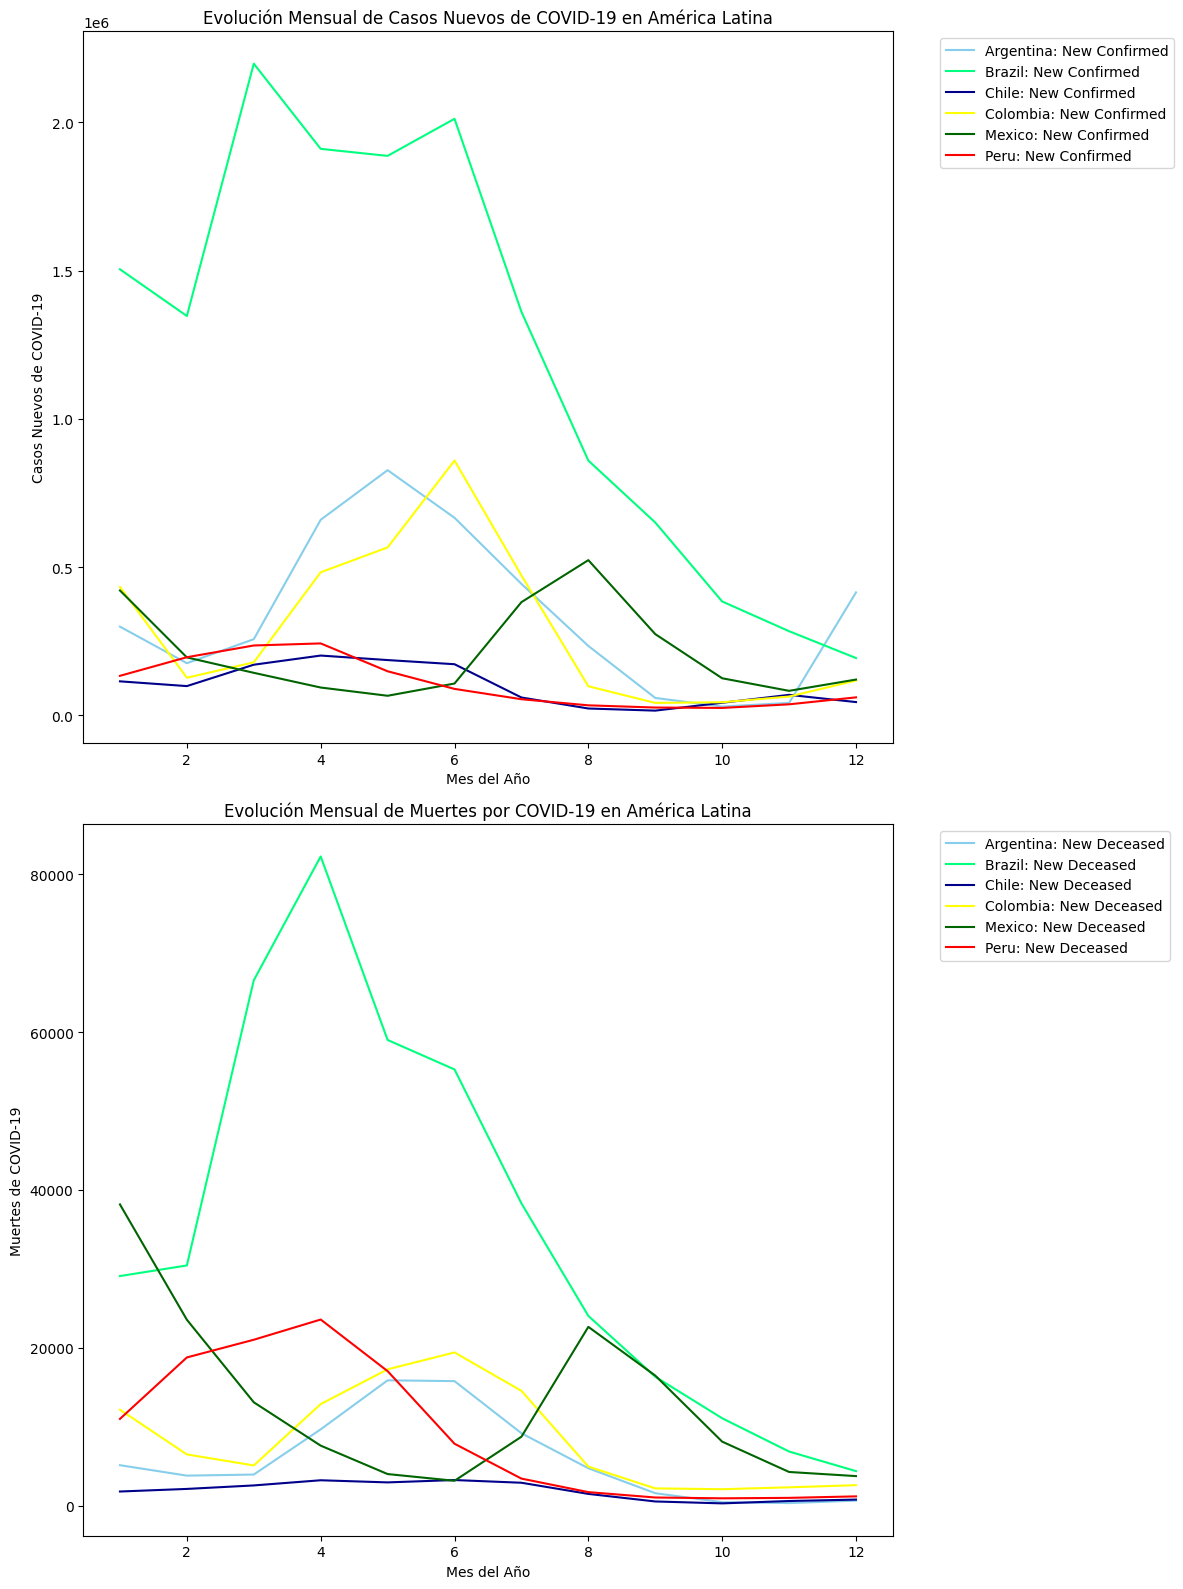

In [70]:
# Ahora realizamos el analisis por meses del año
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed', 'new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country}: New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country}: New Deceased')

ax[0].set_xlabel('Mes del Año')
ax[0].set_ylabel('Casos Nuevos de COVID-19')
ax[0].set_title('Evolución Mensual de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Mes del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Mensual de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, además se nota un pico en las fechas finales.

### 4 Genera gráficas acordes a tu análisis. Las mismas pueden ser:

Evolución de Casos Activos vs. Recuperados
Tasa de Crecimiento (%)
Relación entre la Cobertura de Vacunación y la Reducción de Casos
('País') Progreso de la vacunación por país
Nuevos casos y temperatura promedio
Impacto de la Urbanización en la Propagación del Covid-19
Evolución Semanal de Casos Nuevos
Evolución Anual de Casos Nuevos
Distribución de la Población por Edad en Países
Comparación de Estrategias de Vacunación en América Latina
Evolución del Número de Muertes Diarias.
Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
Variación Mensual de Casos y Muertes
Análisis Temporal de la Mortalidad/
Comparación de la Situación Actual (Contexto de los datos)

In [71]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

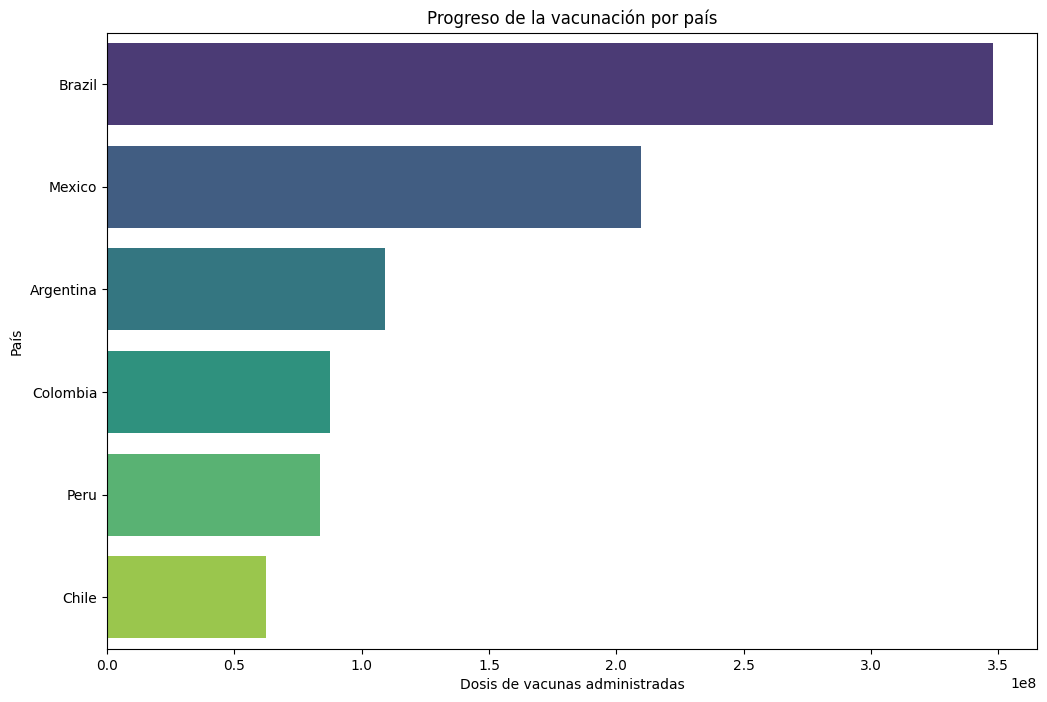

In [72]:
# Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
# Al ser acumulativa utilizamos el maximo y no los sumamos
plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')
plt.show()

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.

¿Y la temperatura cómo se comporta en los países seleccionados?

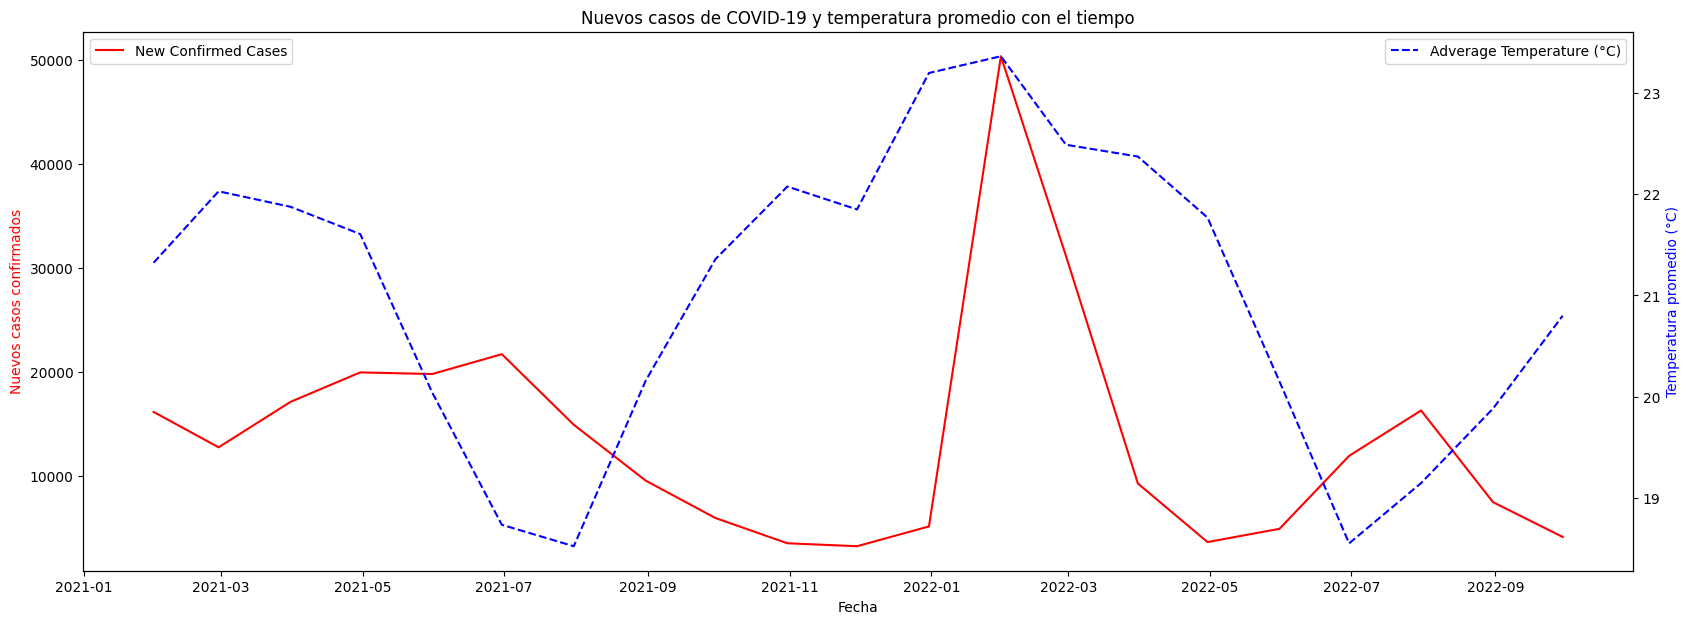

In [73]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades.

ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Adverage Temperature (°C)', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
ax2.set_title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left') # Determino la ubicacion de las leyendas para que 
ax2.legend(loc='upper right')
plt.show()


Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

In [74]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [75]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [76]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            4765656.10
2022-09-15 29381884.00       25390339.00            4765656.10
2022-09-16 29381884.00       25390339.00            4765656.10
2022-09-17 29381884.00       25390339.00            4765656.10

[3744 rows x 3 columns]

In [77]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO        7407.41        185.10   
Brazil                 BR           BR        7407.41        185.10   
Peru                   PE           PE        7407.41        185.10   
Argentina              AR           AR        7407.41        185.10   
Mexico                 MX           MX        7407.41        185.10   
Chile                  CL           CL        7407.41        185.10   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                4765656.10            124442.12   
Brazil                  4765656.10            124442.12   
Peru                    4765656.10            124442.12   
Argentina               4765656.10            124442.12   
Mexico                  4765656.10            124442.12   
Chile                   4765656.10            124442.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                       0.00  50882884.00   
Brazil                                         0.00 212559409.00   
Peru                                           0.00  29381884.00   
Argentina                                      0.00  44938712.00   
Mexico                                         0.00 110991953.00   
Chile                                          0.00  17574003.00   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia          24984564.00        25898320.00  ...            77.11   
Brazil           104435783.00       108123626.00  ...            75.67   
Peru              14450757.00        14931127.00  ...            76.52   
Argentina         19523766.00        20593330.00  ...            76.52   
Mexico            54855231.00        57481307.00  ...            74.99   
Chile              8972014.00         8601989.00  ...            80.04   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia               0.00                  0.00    37   
Brazil                 0.00                  0.00    37   
Peru                   0.00                  0.00    37   
Argentina              0.00                  0.00    37   
Mexico                 0.00                  0.00    37   
Chile                  0.00                  0.00    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                           

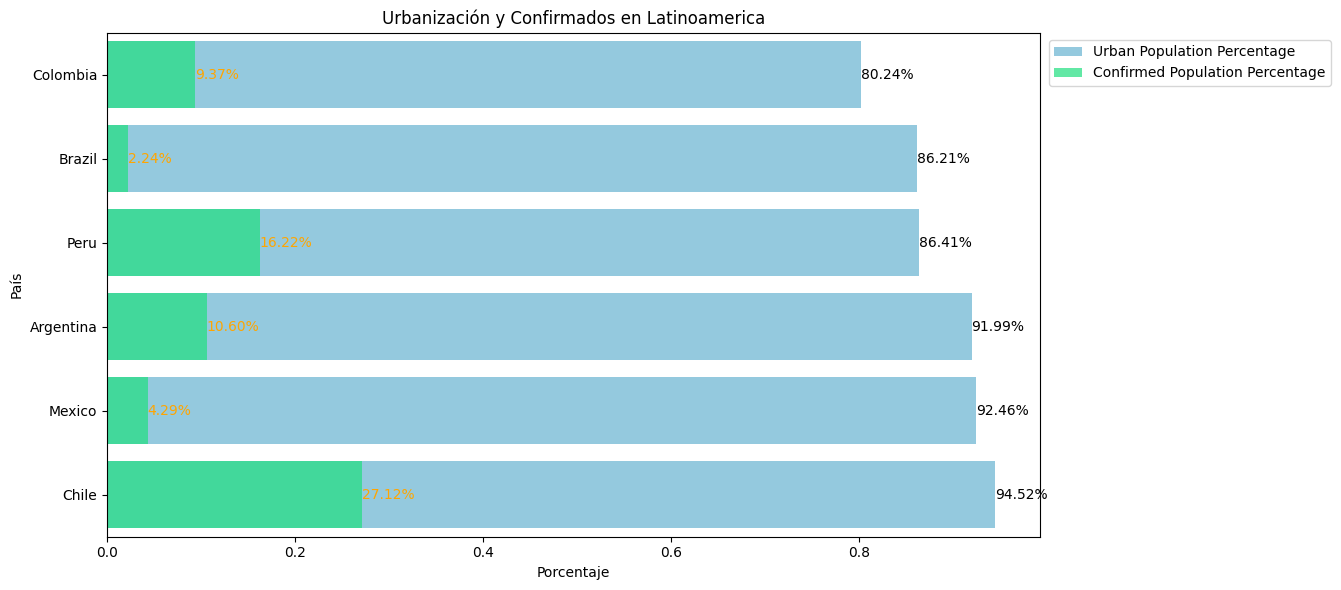

In [78]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()


El pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile.

- Y la densidad de población por grupos de edad?

In [79]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        7407.41   
2022-09-15           PE           PE         Peru        7407.41   
2022-09-16           PE           PE         Peru        7407.41   
2022-09-17           PE           PE         Peru        7407.41   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        185.10            4765656.10            124442.12   
2022-09-15        185.10            4765656.10            124442.12   
2022-09-16        185.10            4765656.10            124442.12   
2022-09-17        185.10            4765656.10            124442.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

In [80]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [81]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [82]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [83]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [84]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [85]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [86]:
age_distribution_arg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [87]:
age_distribution.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [88]:
age_distribution.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [89]:
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [90]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

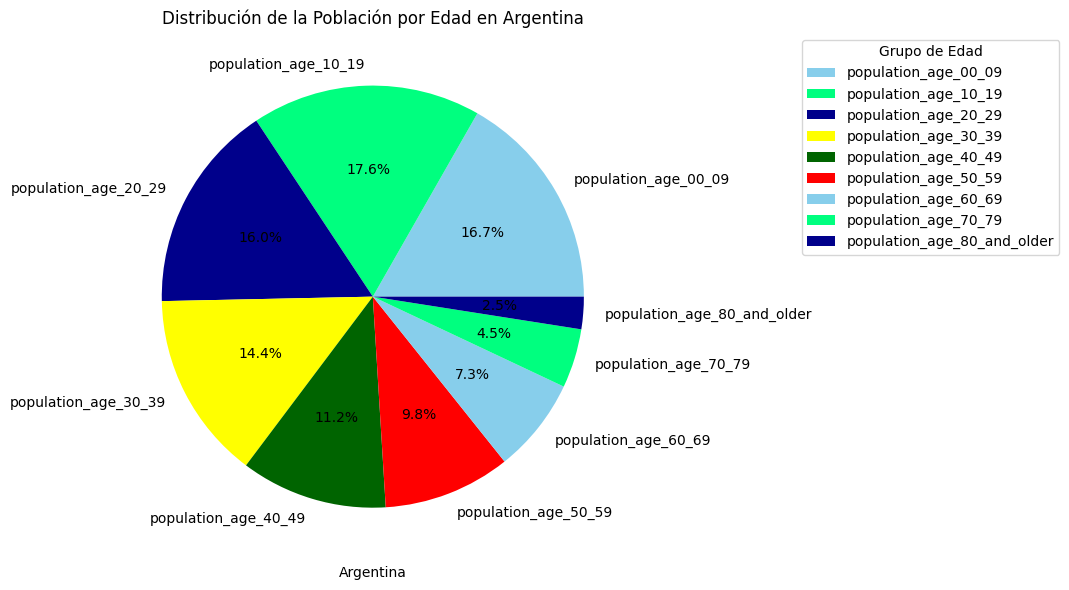

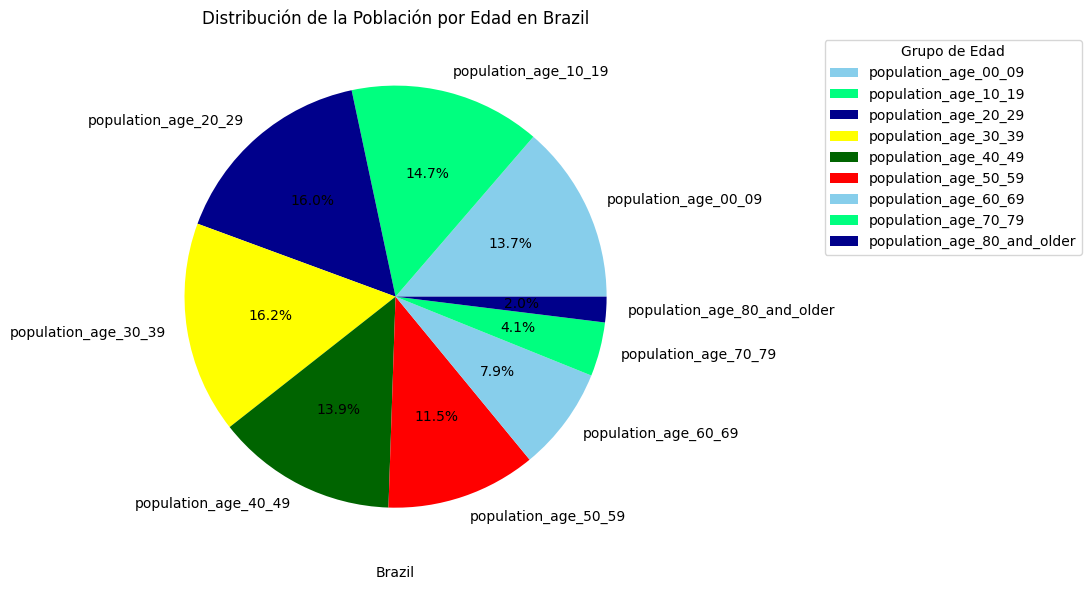

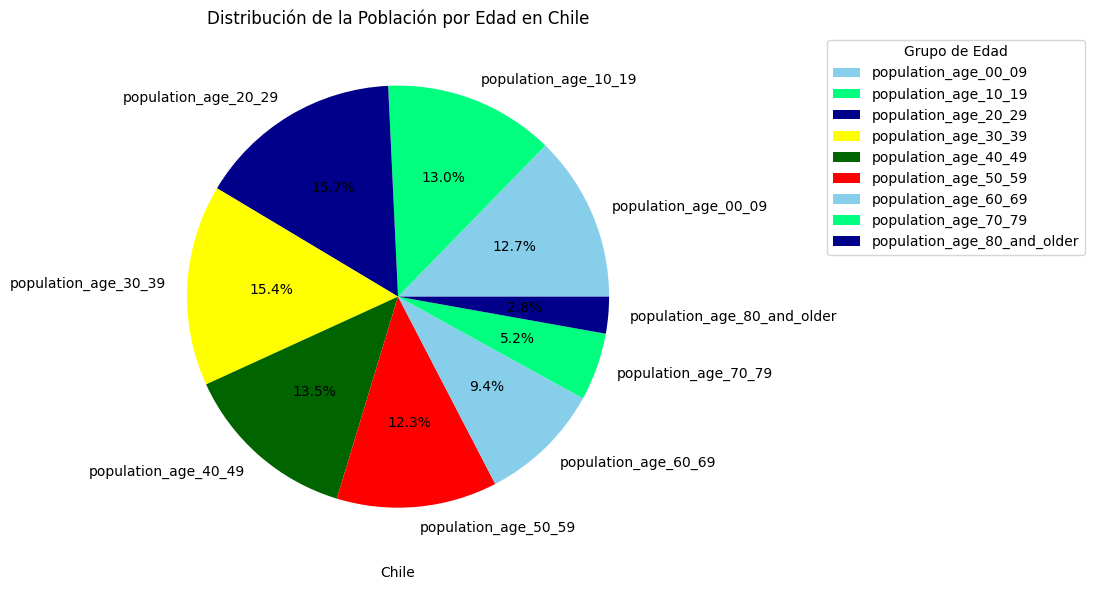

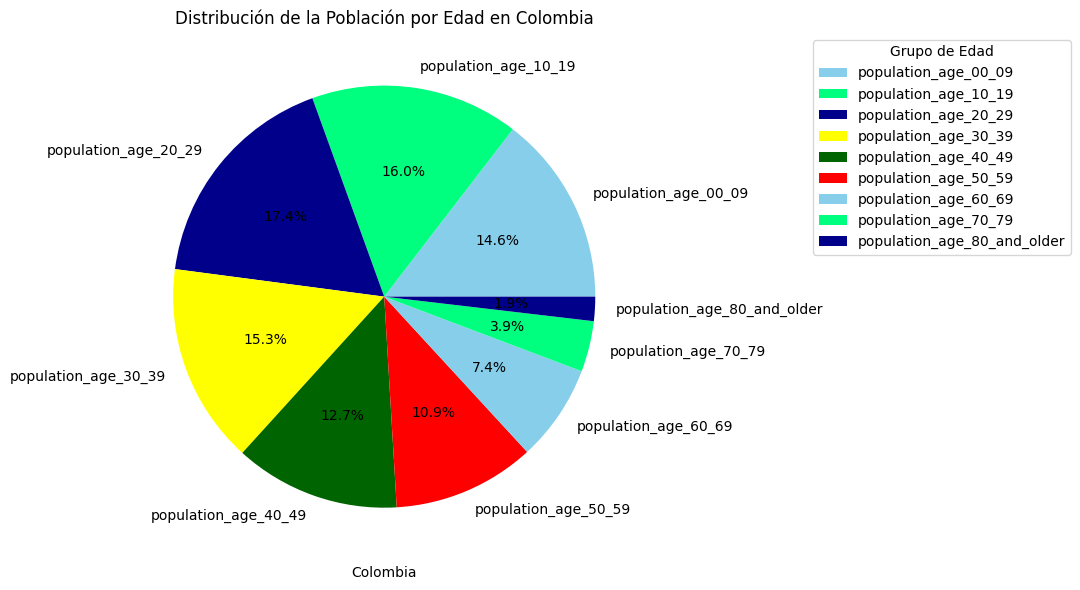

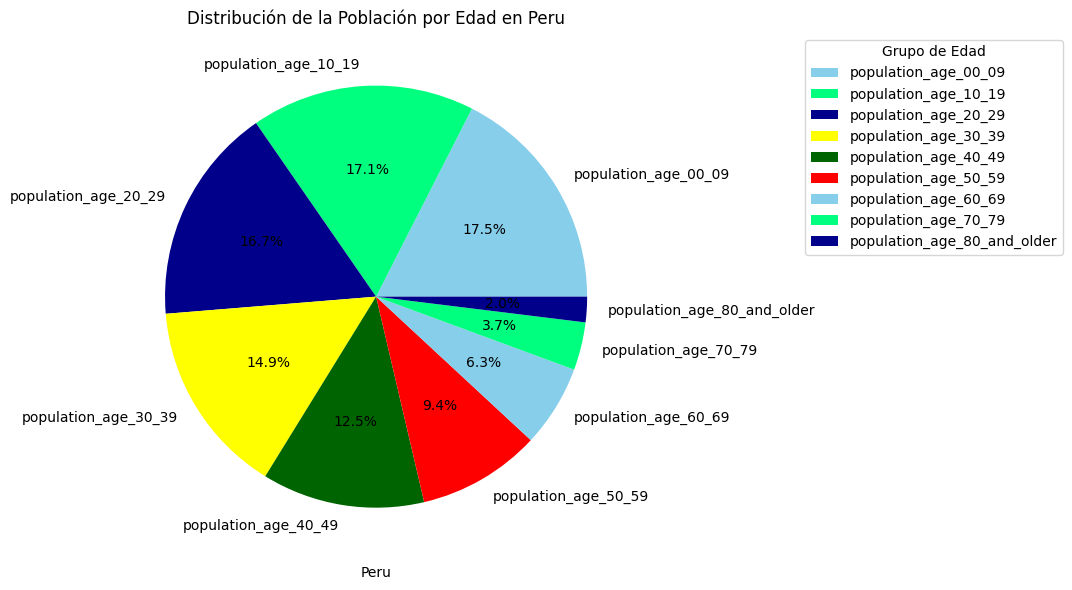

In [91]:
# Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

- Comparación de estrategias de vacunación

In [92]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [93]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [94]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Anterioremente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises.

- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [95]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [96]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [97]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [98]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.01
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

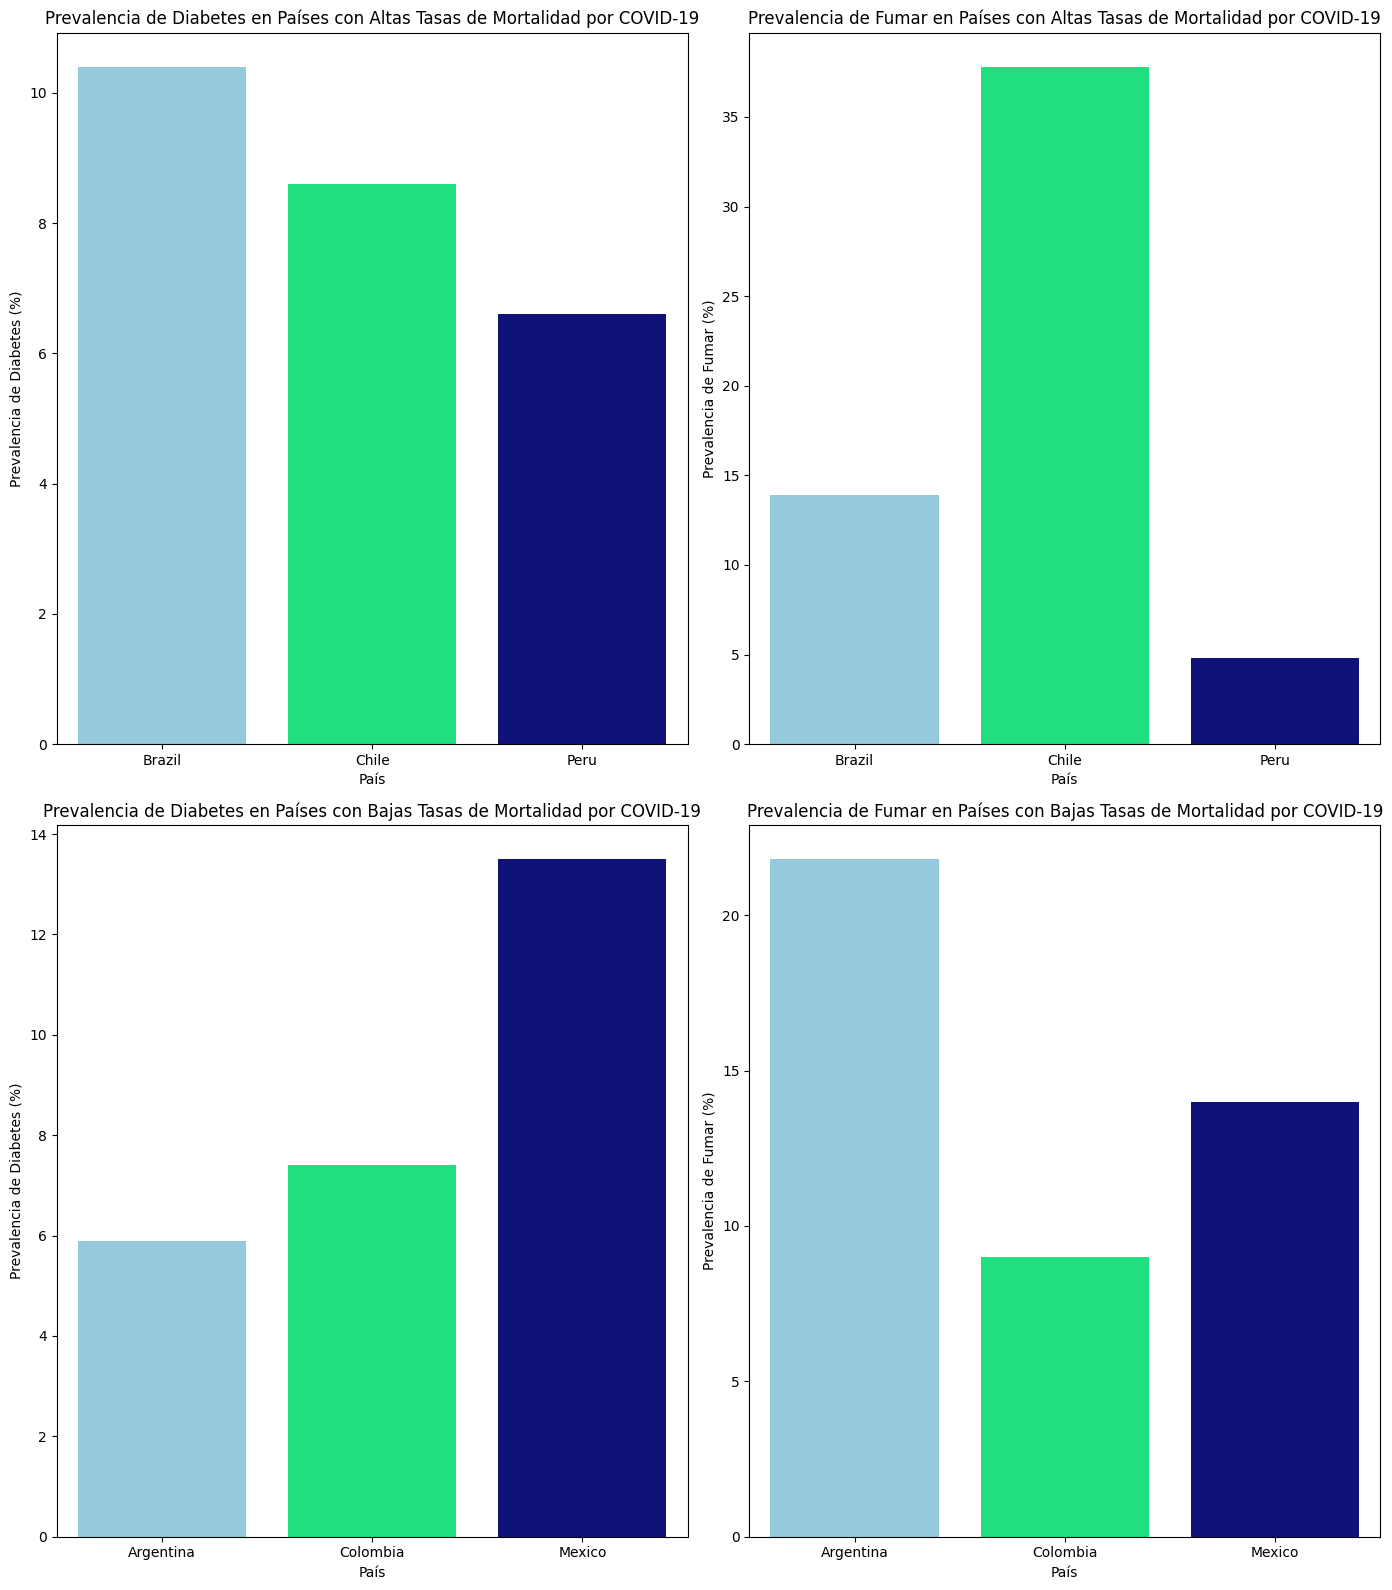

In [99]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

- Fatalidad por país

In [100]:
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina   0.03
Brazil      0.03
Chile       0.03
Colombia    0.03
Mexico      0.03
Peru        0.03
Name: case_fatality_rate, dtype: float64

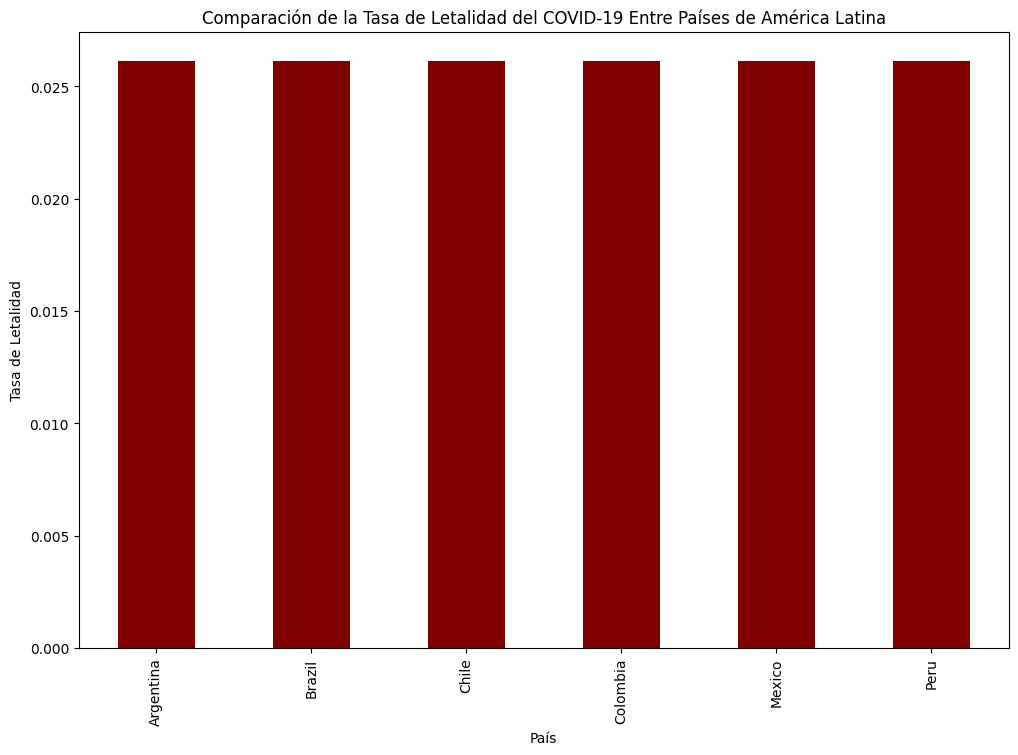

In [101]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muestes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

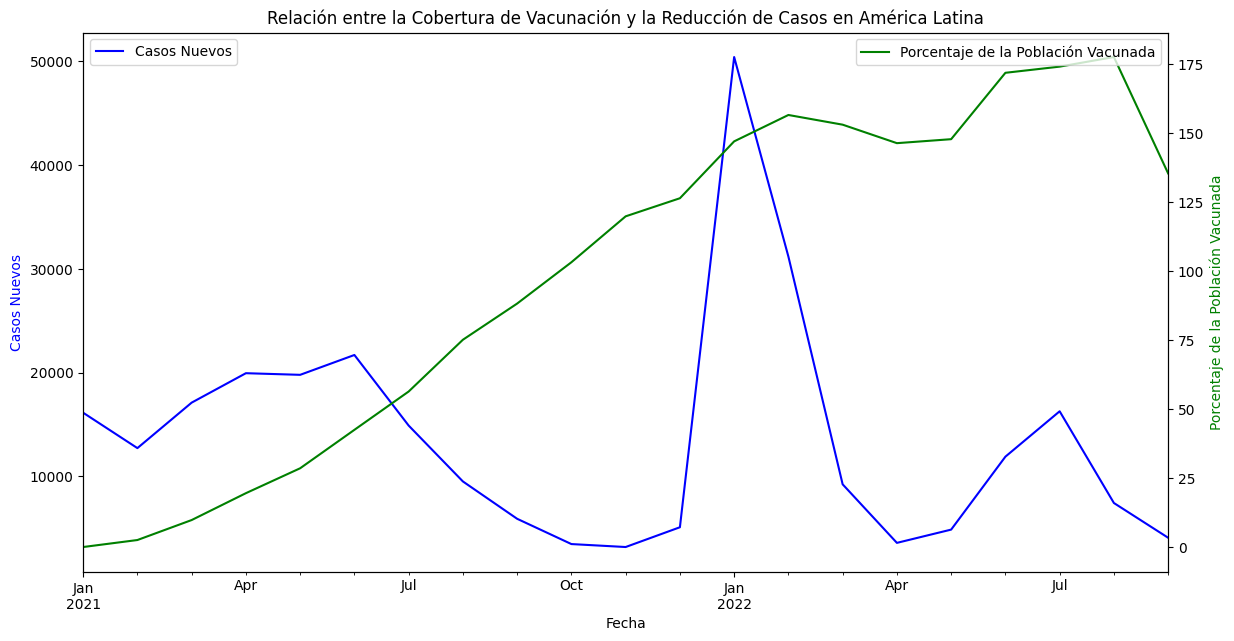

In [102]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

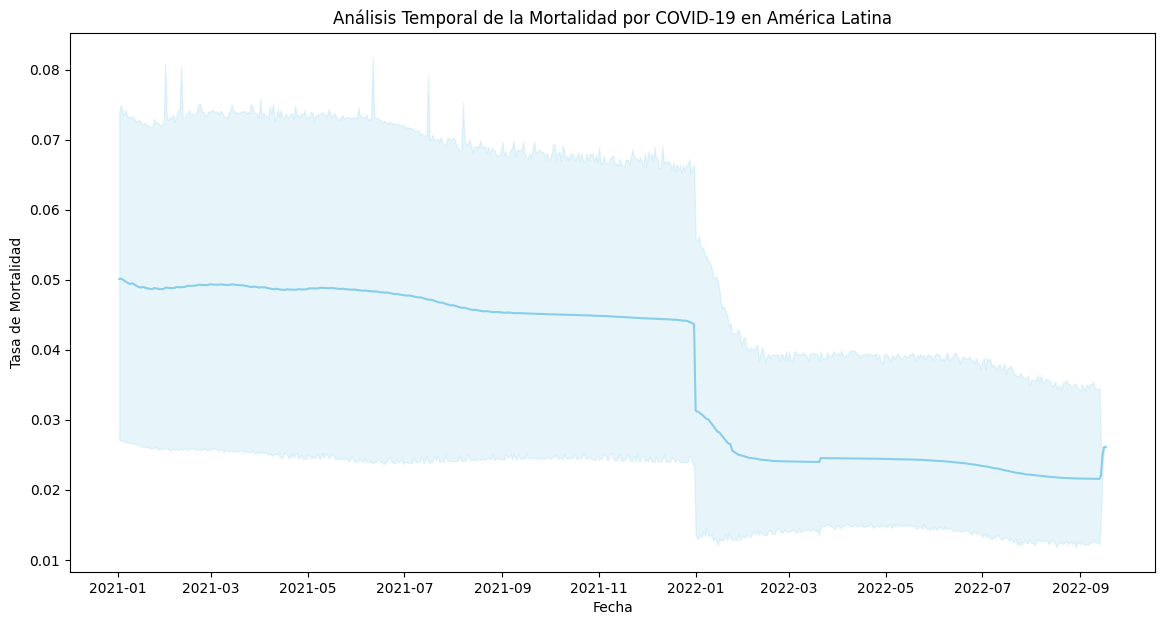

In [103]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina.

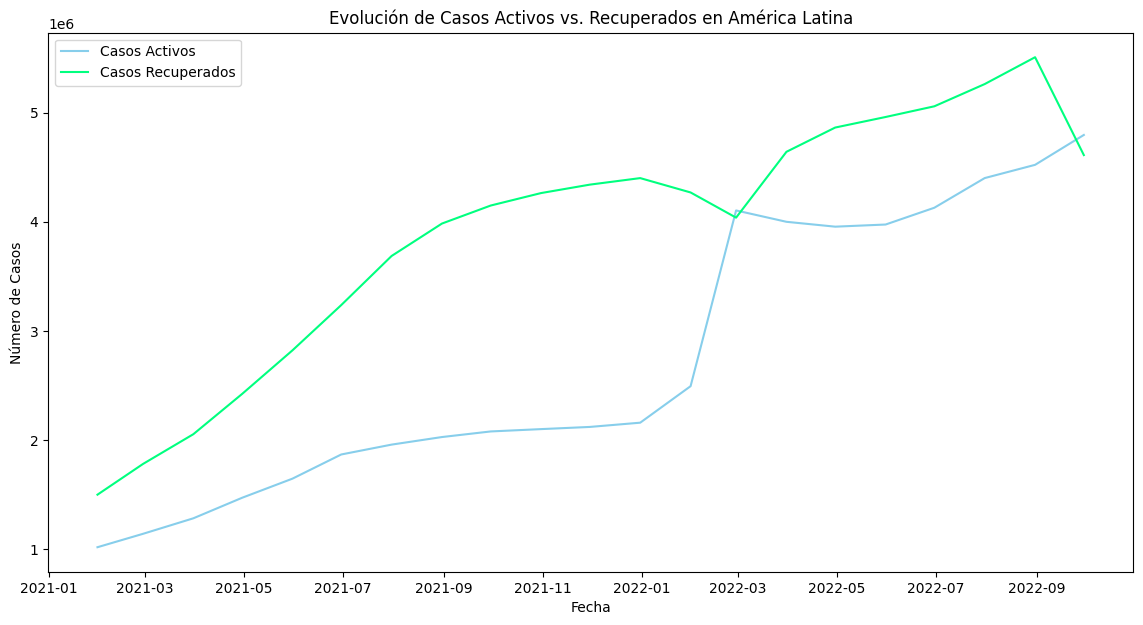

In [104]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

In [105]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina       4641213.98                  0.00            124442.12
Brazil          4641213.98                  0.00            124442.12
Chile           4641213.98                  0.00            124442.12
Colombia        4641213.98                  0.00            124442.12
Mexico          4641213.98                  0.00            124442.12
Peru            4641213.98                  0.00            124442.12

In [106]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           4641213.98                  0.00            124442.12
Mexico          4641213.98                  0.00            304025.00
Peru            4641213.98                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

In [107]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    4641213.98                  0.00   
2022-09-17       Brazil    4641213.98                  0.00   
2022-09-17        Chile    4641213.98                  0.00   
2022-09-17     Colombia    4641213.98                  0.00   
2022-09-17       Mexico    4641213.98                  0.00   
2022-09-17         Peru    4641213.98                  0.00   

            cumulative_deceased  
date                             
2022-09-17            124442.12  
2022-09-17            124442.12  
2022-09-17            124442.12  
2022-09-17            124442.12  
2022-09-17            124442.12  
2022-09-17            124442.12

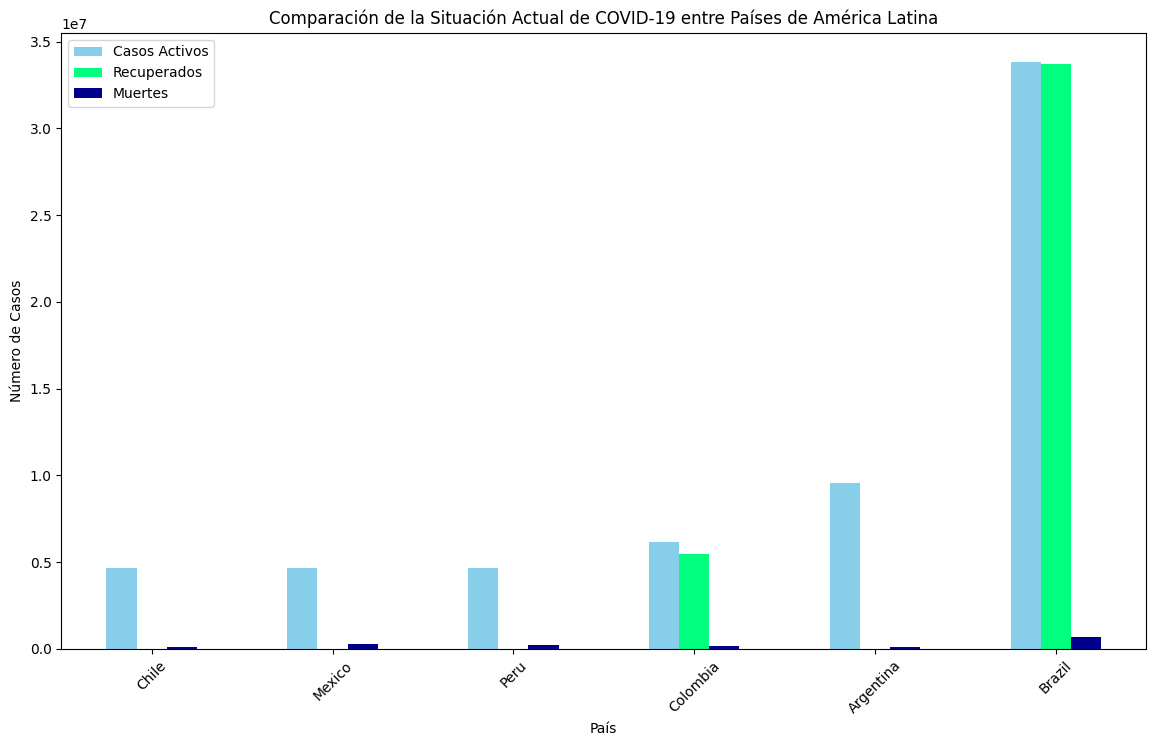

In [108]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por algún mótivo el dataset no está persistiendo los datos acumulados de recuperados. Lo cual no nos permite ver la cantidad de recuperados actuales de cada pais

Comparacion tasa Femenina vs Masculina

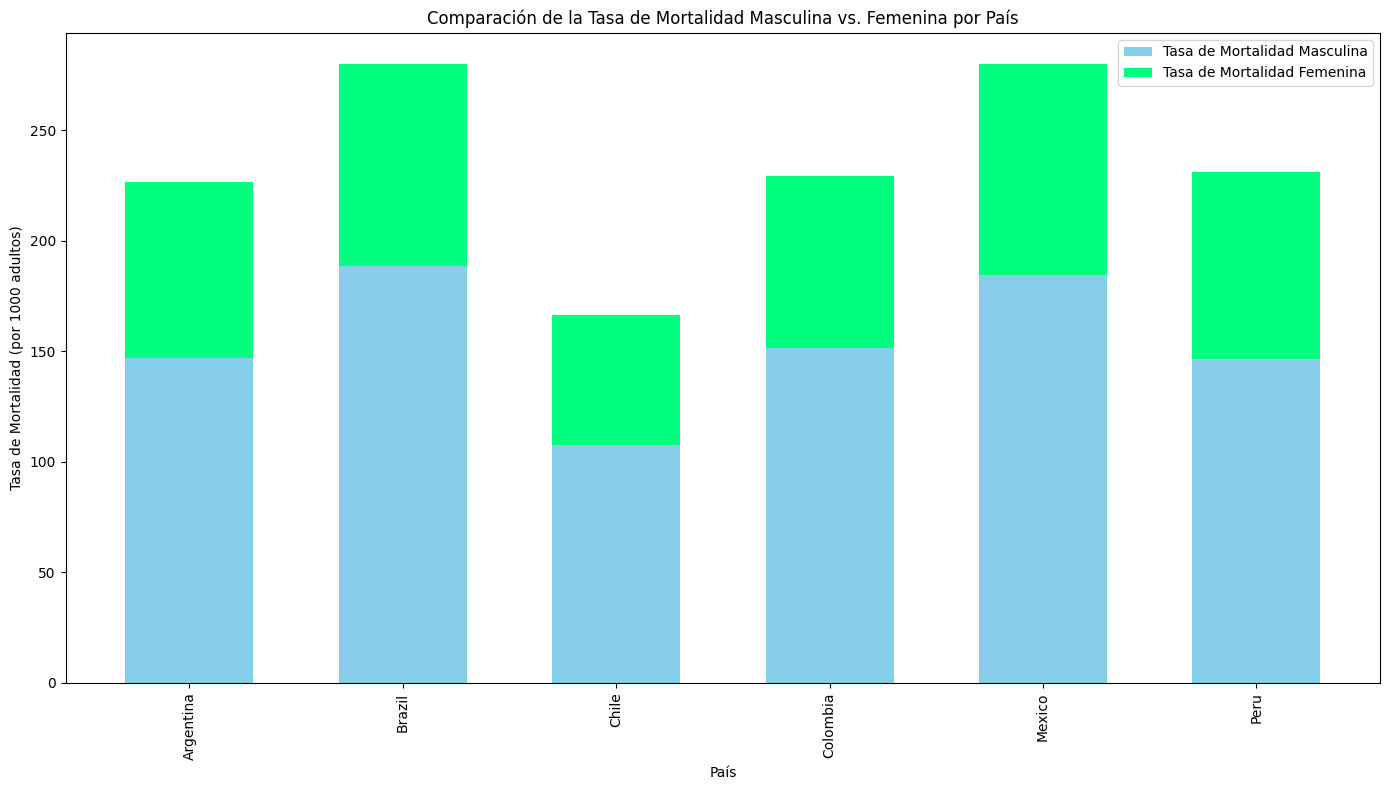

In [109]:
# Agrupar los datos por país y calcular la media de las tasas de mortalidad masculina y femenina
mortality_data = data_latinoamerica_paises.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean().reset_index()

# Crear el diagrama de barras apilado
fig, ax = plt.subplots(figsize=(14, 8))

# Crear las barras
bar_width = 0.6
bar1 = ax.bar(mortality_data['country_name'], mortality_data['adult_male_mortality_rate'], bar_width, label='Tasa de Mortalidad Masculina')
bar2 = ax.bar(mortality_data['country_name'], mortality_data['adult_female_mortality_rate'], bar_width, bottom=mortality_data['adult_male_mortality_rate'], label='Tasa de Mortalidad Femenina')

# Añadir etiquetas y título
ax.set_xlabel('País')
ax.set_ylabel('Tasa de Mortalidad (por 1000 adultos)')
ax.set_title('Comparación de la Tasa de Mortalidad Masculina vs. Femenina por País')
ax.legend()

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [110]:
mortality_data

country_name  adult_male_mortality_rate  adult_female_mortality_rate
0    Argentina                     147.09                        79.48
1       Brazil                     188.53                        91.42
2        Chile                     107.67                        59.03
3     Colombia                     151.62                        78.00
4       Mexico                     184.38                        95.81
5         Peru                     146.37                        84.81

5 Investiga posibles correlaciones entre las distintas características.


En el Avance 3, para investigar posibles correlaciones entre las distintas características del dataset, utilizamos análisis de correlación, específicamente el cálculo del coeficiente de correlación de Pearson. Este método nos permitió identificar la relación lineal entre diferentes variables.

Relaciones Identificadas
Incidencia de COVID-19 y Temperatura:

new_confirmed y average_temperature_celsius
Incidencia Acumulada de COVID-19 y Temperatura:

cumulative_confirmed y average_temperature_celsius
Tasas de Vacunación e Infraestructura Sanitaria:

cumulative_vaccine_doses_administered y hospital_beds_per_1000
cumulative_vaccine_doses_administered y physicians_per_1000
cumulative_vaccine_doses_administered y nurses_per_1000
Incidencia de COVID-19 y Densidad de Población:

new_confirmed y population_density
Tasas de Vacunación y Densidad de Población:

cumulative_vaccine_doses_administered y population_density
Incidencia de COVID-19 y PIB:

new_confirmed y gdp_usd
Tasas de Vacunación y PIB:

cumulative_vaccine_doses_administered y gdp_usd
Estas correlaciones nos proporcionan una comprensión más profunda de cómo se relacionan las diferentes variables y nos ayudan a identificar factores clave que influyen en la propagación del COVID-19 y en la eficacia de las campañas de vacunación.

6 Aplica las funciones creadas sobre cada columna de acuerdo a tus necesidades.

Te dejamos algunos  tips  que pueden ayudarte a avanzar en tu proyecto:

• Organización del código: Antes de comenzar con el análisis exploratorio, asegúrate de mantener un código limpio y organizado. 

• Identificación de tendencias y patrones: Utiliza métodos como la descomposición de series temporales, análisis de autocorrelación y otras técnicas avanzadas para identificar tendencias, estacionalidad y patrones relevantes en los datos temporales. Examina las correlaciones utilizando funciones como corr() en Pandas.

• Creatividad en la visualización: A la hora de generar gráficas, sé creativo y piensa en cuál es la mejor manera de representar la información. No te limites a los gráficos básicos, considera utilizar visualizaciones más complejas que puedan resaltar los insights obtenidos.

• Aplicación de funciones personalizadas: Si es necesario, crea y aplica funciones personalizadas sobre cada columna según las necesidades específicas del análisis. Esto puede ayudar a automatizar tareas repetitivas y a simplificar el código.

Cada paso en tu análisis de datos te acerca más a comprender la situación en profundidad. Al utilizar técnicas avanzadas de análisis exploratorio, estás descubriendo patrones significativos en los datos, desde la evolución de casos activos hasta la relación entre la cobertura de vacunación y la reducción de casos. Sigue adelante con tu investigación y explora posibles correlaciones entre las distintas características. Tu dedicación y perseverancia son clave para extraer el máximo valor de los datos y contribuir significativamente a entender la situación actual. 

EXTRA CREDIT

Como parte del desafío extra, te proponemos crear mapas utilizando la información de latitud y longitud disponible en tus datos. Puedes emplear diferentes herramientas, en clases desarrollamos Geopandas pero también puedes explorar Folium, u otras plataformas similares para visualizar geoespacialmente la información que estás analizando. Esto te permitirá explorar la distribución geográfica de los datos y obtener una perspectiva más completa de la situación. ¡Anímate a añadir este componente adicional a tu análisis para enriquecer aún más tus descubrimientos! 

¿Tienes conocimientos en Machine Learning?

Si es así, puedes enfocarte en el modelado para Machine Learning, realizando la limpieza y preparación final de los datos. Deberás asegurarte de que el conjunto de datos esté limpio, bien estructurado y listo para ser utilizado en modelos avanzados. Esta fase puede incluir la imputación de valores faltantes, la normalización de datos y la transformación de variables para mejorar la interpretación de los modelos. Estos pasos son opcionales pero pueden ser cruciales para el éxito del análisis. Luego puedes utilizar modelos de Machine Learning simples, adaptados al contexto que propongas. ¡Es el momento de aplicar tus conocimientos en modelos predictivos y explorar nuevas perspectivas a partir de tus datos!

Para tener un mejor contexto graficamos la cantidad de vacunas administradas,los casos confirmados, muertes y recuperados.

In [111]:
! pip install folium

In [112]:
! pip freeze > ../requirements.txt

In [113]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

No se ve muy detallado en las anteriores gráficas, por lo que vamos a realizar un análisis más detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada país pero con gráficos mas básicos manteniendo los mapas.

In [114]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
# path = "ne_110m_admin_0_countries.zip"
path = r"C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\Lecture 8 EDA\110m_cultural.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:261: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


In [115]:
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [116]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [117]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6 entries, 9 to 32
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 7.4+ KB


In [118]:
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [119]:
# Mergeo con mi dataset agrupado
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...           9697763.00  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...           4765656.10  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...           4765656.10  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...          34568833.00  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...           4765656.10  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...           6304317.00  

[6 rows x 170 columns]

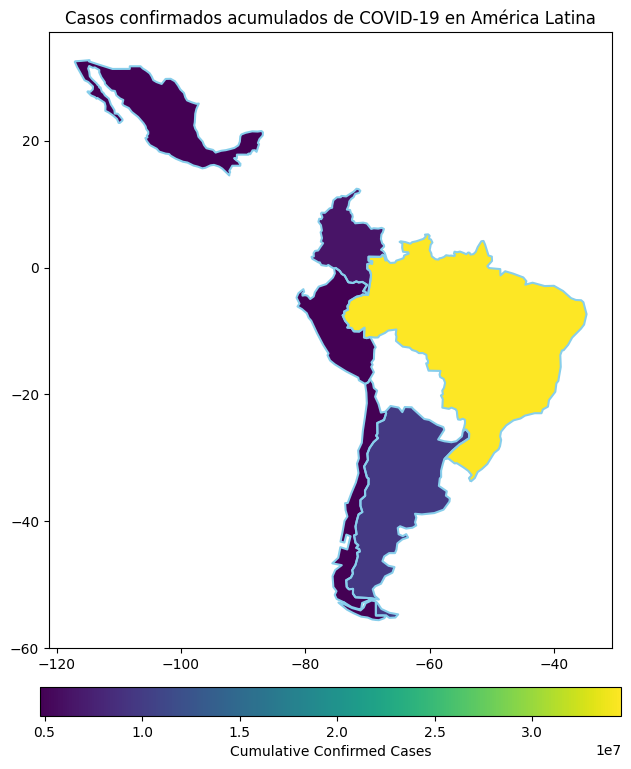

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

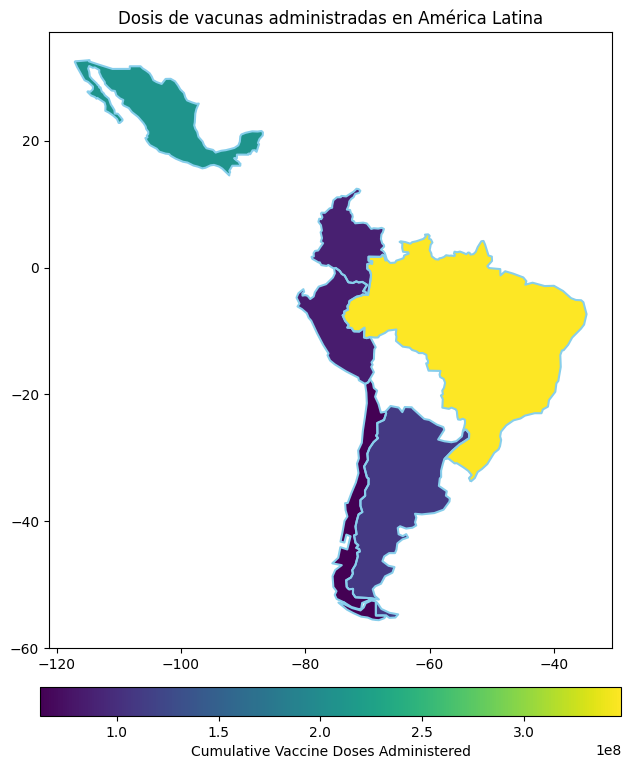

In [121]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

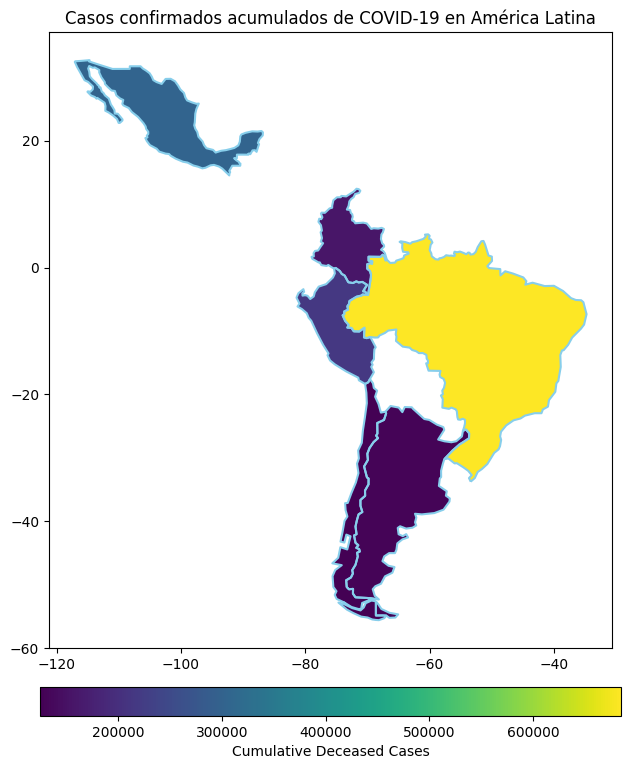

In [122]:
# mapa para ver la distribución muertes en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

# Avance 4

### 1. Conexión de Python con Power BI:

In [123]:
import pandas as pd

data_latinoamerica_paises = pd.read_csv(r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\DatosFinalesFiltrado.csv')

print(data_latinoamerica_paises)

     location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina        7767.00   
1              AR  2021-01-03           AR    Argentina        4934.00   
2              AR  2021-01-04           AR    Argentina       13953.00   
3              AR  2021-01-05           AR    Argentina       14085.00   
4              AR  2021-01-06           AR    Argentina       14496.00   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru        1150.00   
3740           PE  2022-09-14           PE         Peru        7407.41   
3741           PE  2022-09-15           PE         Peru        7407.41   
3742           PE  2022-09-16           PE         Peru        7407.41   
3743           PE  2022-09-17           PE         Peru        7407.41   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166.00            1670634.00      

### Creación de Dashboards en Power BI

Para esto determinamos algunos insights necesarias para dar respuesta al objetivo del estudio, que es determinar la ubicación optima.

  country_name  incidences  vaccination_rate  hospital_infrastructure
0    Argentina  9697763.00              2.43                     4.32
1       Brazil 34568833.00              1.64                     3.72
2        Chile  4765656.10              3.54                     4.49
3     Colombia  6304317.00              1.72                     1.77
4       Mexico  4765656.10              1.89                     1.74
5         Peru  4765656.10              2.85                     1.68
  country_name  incidences  vaccination_rate  hospital_infrastructure  score
1       Brazil        1.00              0.00                     0.73   0.62
2        Chile        0.00              1.00                     1.00   0.60
0    Argentina        0.17              0.42                     0.94   0.47
5         Peru        0.00              0.64                     0.00   0.19
4       Mexico        0.00              0.13                     0.02   0.05
3     Colombia        0.05              0.04    

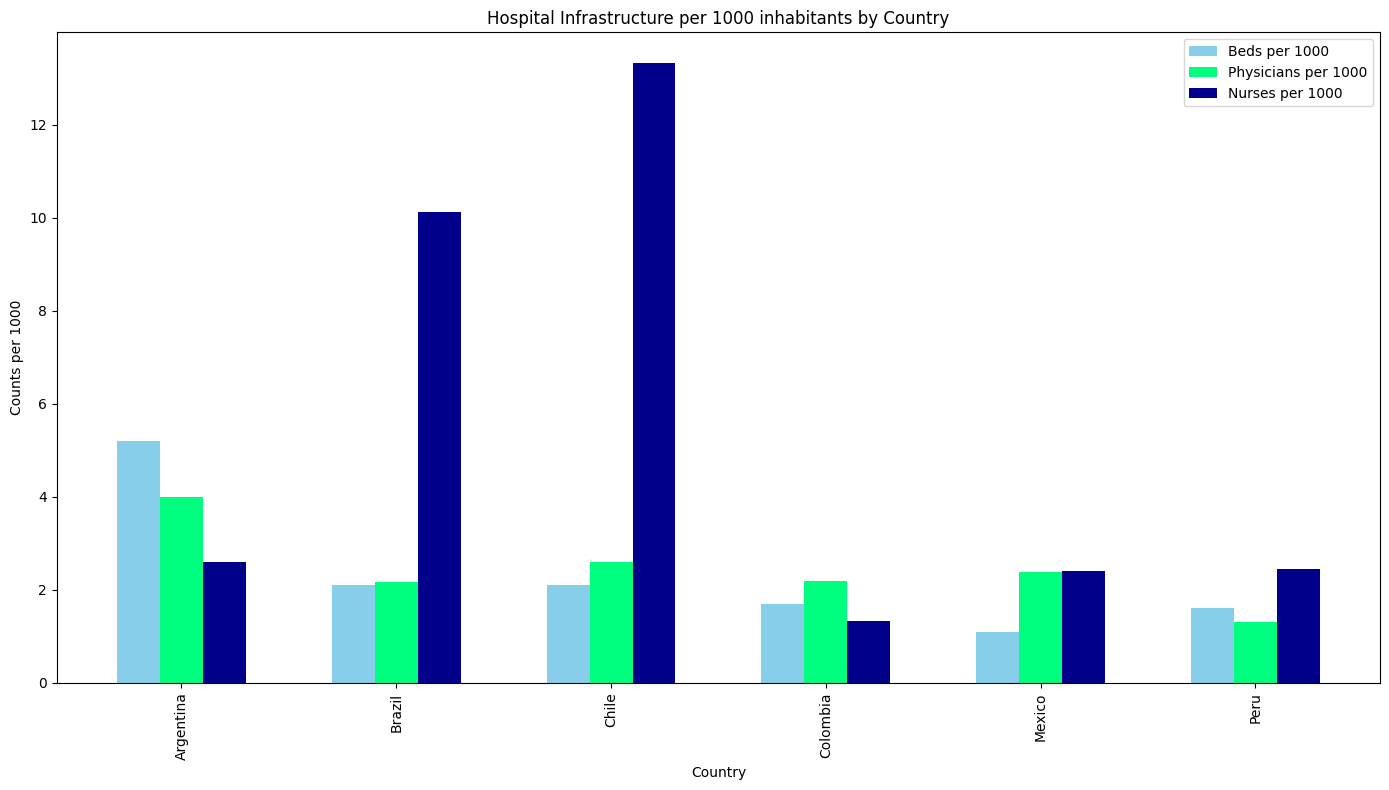

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Leer los archivos CSV
hospital_beds_path = 'Hospital_Beds_Per_1000.csv'
data_path = 'DatosFinalesFiltrado.csv'

hospital_beds = pd.read_csv(hospital_beds_path)
data = pd.read_csv(data_path)

# Unir los datos basados en el nombre del país
merged_data = pd.merge(data, hospital_beds, on='country_name', how='left')

# Calcular la tasa de vacunación usando el valor máximo de 'cumulative_vaccine_doses_administered' y 'population'
merged_data['vaccination_rate'] = merged_data.groupby('country_name')['cumulative_vaccine_doses_administered'].transform('max') / merged_data.groupby('country_name')['population'].transform('max')

# Calcular incidencias de COVID-19 usando el valor máximo de 'cumulative_confirmed'
merged_data['incidences'] = merged_data.groupby('country_name')['cumulative_confirmed'].transform('max')

# Calcular el indicador de infraestructura sanitaria
merged_data['hospital_infrastructure'] = (
    merged_data['beds_per_1000'] * 0.5 +
    merged_data['physicians_per_1000'] * 0.3 +
    merged_data['nurses_per_1000'] * 0.2
)

# Calcular la demanda de vacunas (estimada como la población no vacunada)
merged_data['vaccine_demand'] = merged_data['population'] * (1 - merged_data['vaccination_rate'])

# Calcular la logística de distribución (estimada como la densidad de población)
merged_data['distribution_logistics'] = merged_data['population_density']

# Calcular el indicador de infraestructura sanitaria (ya calculado anteriormente)
merged_data['infrastructure'] = merged_data['hospital_infrastructure']

# Crear un DataFrame con los indicadores clave por país
summary = merged_data.groupby('country_name').agg({
    'incidences': 'max',
    'vaccination_rate': 'max',
    'hospital_infrastructure': 'max'
}).reset_index()

print(summary)

# Normalizar los indicadores
scaler = MinMaxScaler()
summary[['incidences', 'vaccination_rate', 'hospital_infrastructure']] = scaler.fit_transform(
    summary[['incidences', 'vaccination_rate', 'hospital_infrastructure']]
)

# Calcular la puntuación combinada (ajusta los pesos según tu criterio)
summary['score'] = (summary['incidences'] * 0.4 + 
                    summary['vaccination_rate'] * 0.3 + 
                    summary['hospital_infrastructure'] * 0.3)

# Ordenar los países por puntuación
optimal_locations = summary.sort_values(by='score', ascending=False)

print(optimal_locations)

# Generamos el grafico Infraestructura Hospitalaria

# Crear un DataFrame resumen con los valores máximos de 'beds_per_1000', 'physicians_per_1000' y 'nurses_per_1000' por país
summary_data = merged_data.groupby('country_name').agg({
    'beds_per_1000': 'max',
    'physicians_per_1000': 'max',
    'nurses_per_1000': 'max'
}).reset_index()


Infraestructure=summary_data

# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = range(len(summary_data['country_name']))

# Gráfico de barras para 'beds_per_1000'
bars1 = plt.bar(index, summary_data['beds_per_1000'], bar_width, label='Beds per 1000')

# Gráfico de barras para 'physicians_per_1000'
bars2 = plt.bar([i + bar_width for i in index], summary_data['physicians_per_1000'], bar_width, label='Physicians per 1000')

# Gráfico de barras para 'nurses_per_1000'
bars3 = plt.bar([i + 2 * bar_width for i in index], summary_data['nurses_per_1000'], bar_width, label='Nurses per 1000')

# Configurar etiquetas y título
plt.xlabel('Country')
plt.ylabel('Counts per 1000')
plt.title('Hospital Infrastructure per 1000 inhabitants by Country')
plt.xticks([i + bar_width for i in index], summary_data['country_name'], rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

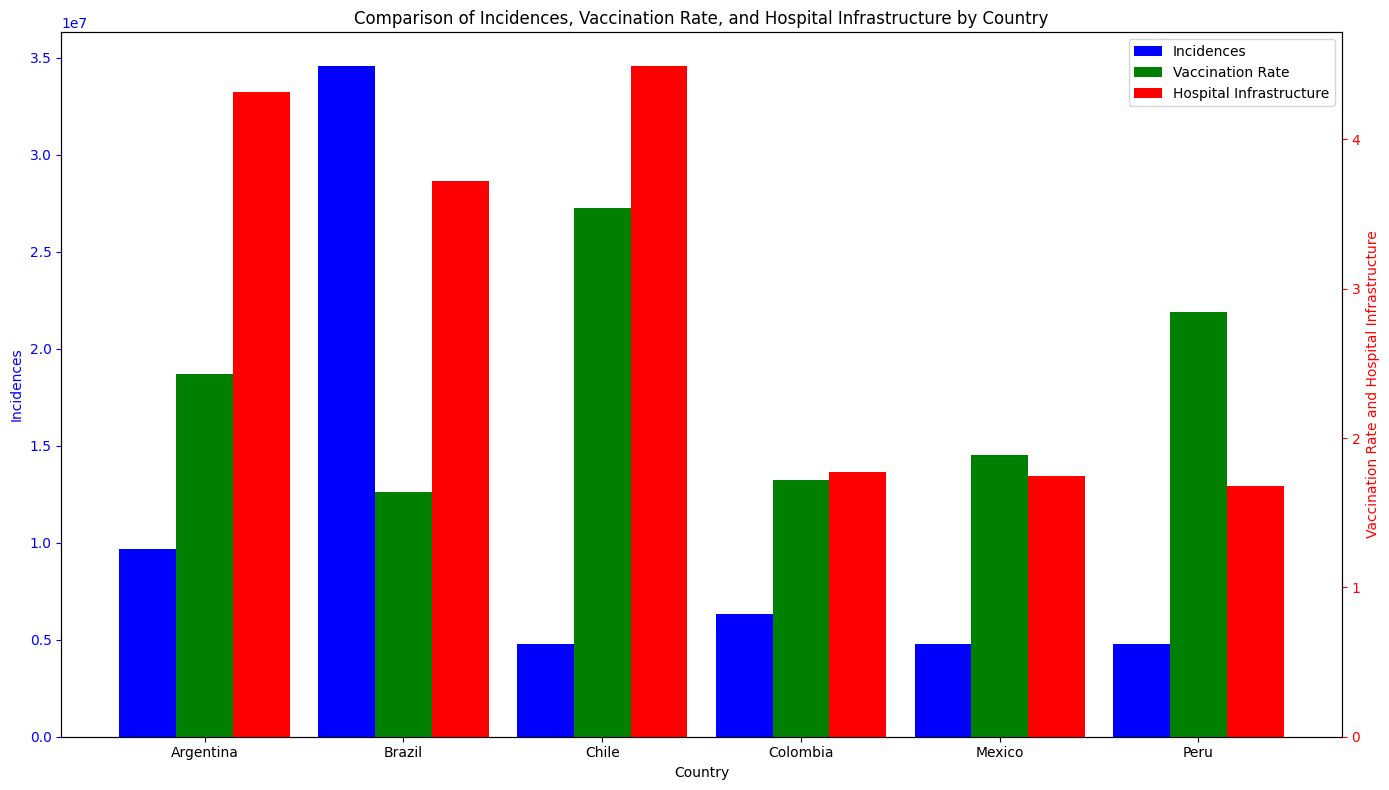

In [125]:
import matplotlib.pyplot as plt

# Crear un DataFrame resumen con los valores máximos de 'incidences', 'vaccination_rate' y 'hospital_infrastructure' por país
summary_data = merged_data.groupby('country_name').agg({
    'incidences': 'max',
    'vaccination_rate': 'max',
    'hospital_infrastructure': 'max'
}).reset_index()

# Configurar el gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 0.2
spacing = 0.3  # Espacio adicional entre grupos de barras
index = [i * (bar_width * 2 + spacing) for i in range(len(summary_data['country_name']))]

# Gráfico de barras para 'incidences' en el eje izquierdo
bars1 = ax1.bar(index, summary_data['incidences'], bar_width, label='Incidences', color='b')
ax1.set_xlabel('Country')
ax1.set_ylabel('Incidences', color='b')
ax1.tick_params('y', colors='b')

# Crear un segundo eje para 'vaccination_rate' y 'hospital_infrastructure'
ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], summary_data['vaccination_rate'], bar_width, label='Vaccination Rate', color='g')
bars3 = ax2.bar([i + 2 * bar_width for i in index], summary_data['hospital_infrastructure'], bar_width, label='Hospital Infrastructure', color='r')

ax2.set_ylabel('Vaccination Rate and Hospital Infrastructure', color='r')
ax2.tick_params('y', colors='r')

# Configurar etiquetas y título
plt.title('Comparison of Incidences, Vaccination Rate, and Hospital Infrastructure by Country')
plt.xticks([i + bar_width for i in index], summary_data['country_name'], rotation=90)

# Añadir leyenda
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Mostrar el gráfico
plt.show()


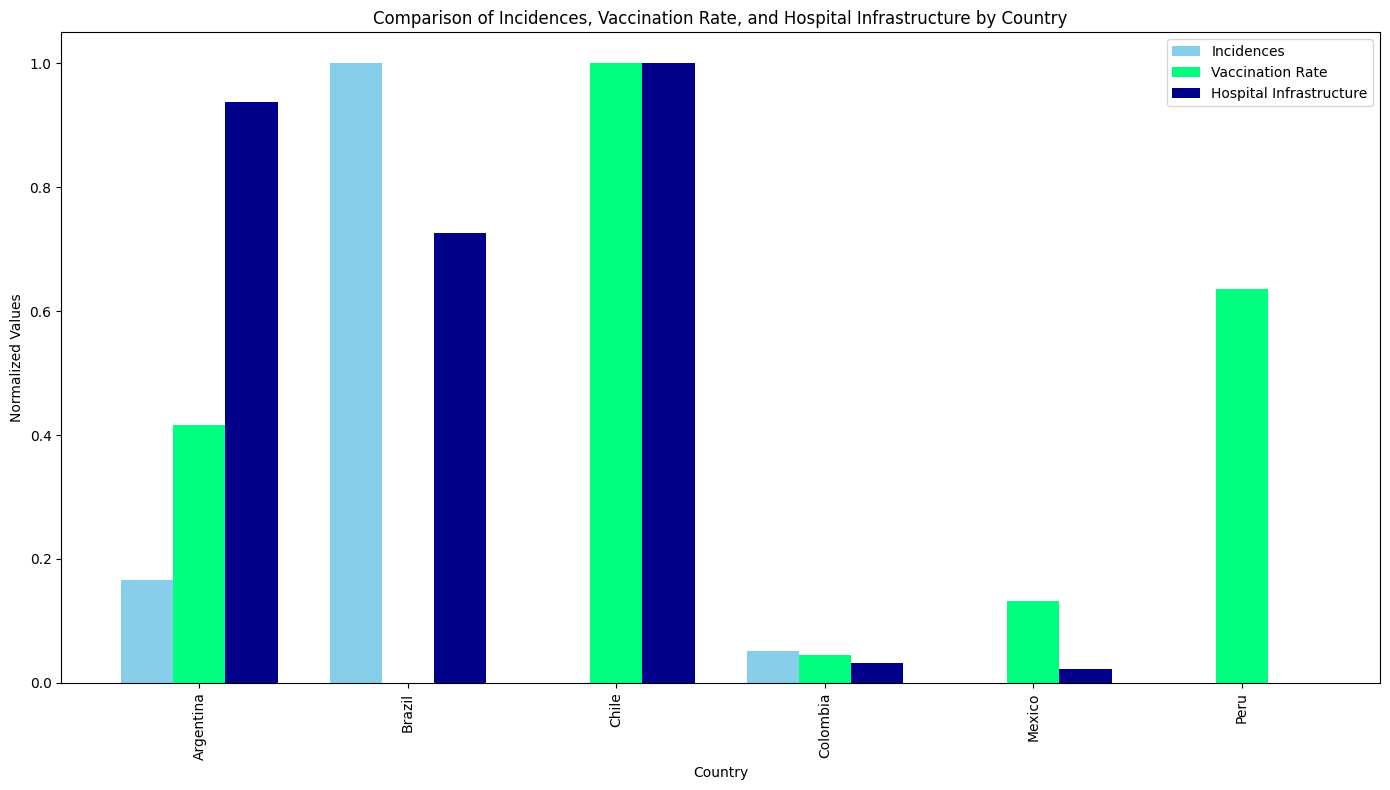

In [126]:
# Configurar el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.25
index = range(len(summary['country_name']))

# Gráfico de barras para 'incidences'
bars1 = plt.bar(index, summary['incidences'], bar_width, label='Incidences')

# Gráfico de barras para 'vaccination_rate'
bars2 = plt.bar([i + bar_width for i in index], summary['vaccination_rate'], bar_width, label='Vaccination Rate')

# Gráfico de barras para 'hospital_infrastructure'
bars3 = plt.bar([i + 2 * bar_width for i in index], summary['hospital_infrastructure'], bar_width, label='Hospital Infrastructure')

# Configurar etiquetas y título
plt.xlabel('Country')
plt.ylabel('Normalized Values')
plt.title('Comparison of Incidences, Vaccination Rate, and Hospital Infrastructure by Country')
plt.xticks([i + bar_width for i in index], summary['country_name'], rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

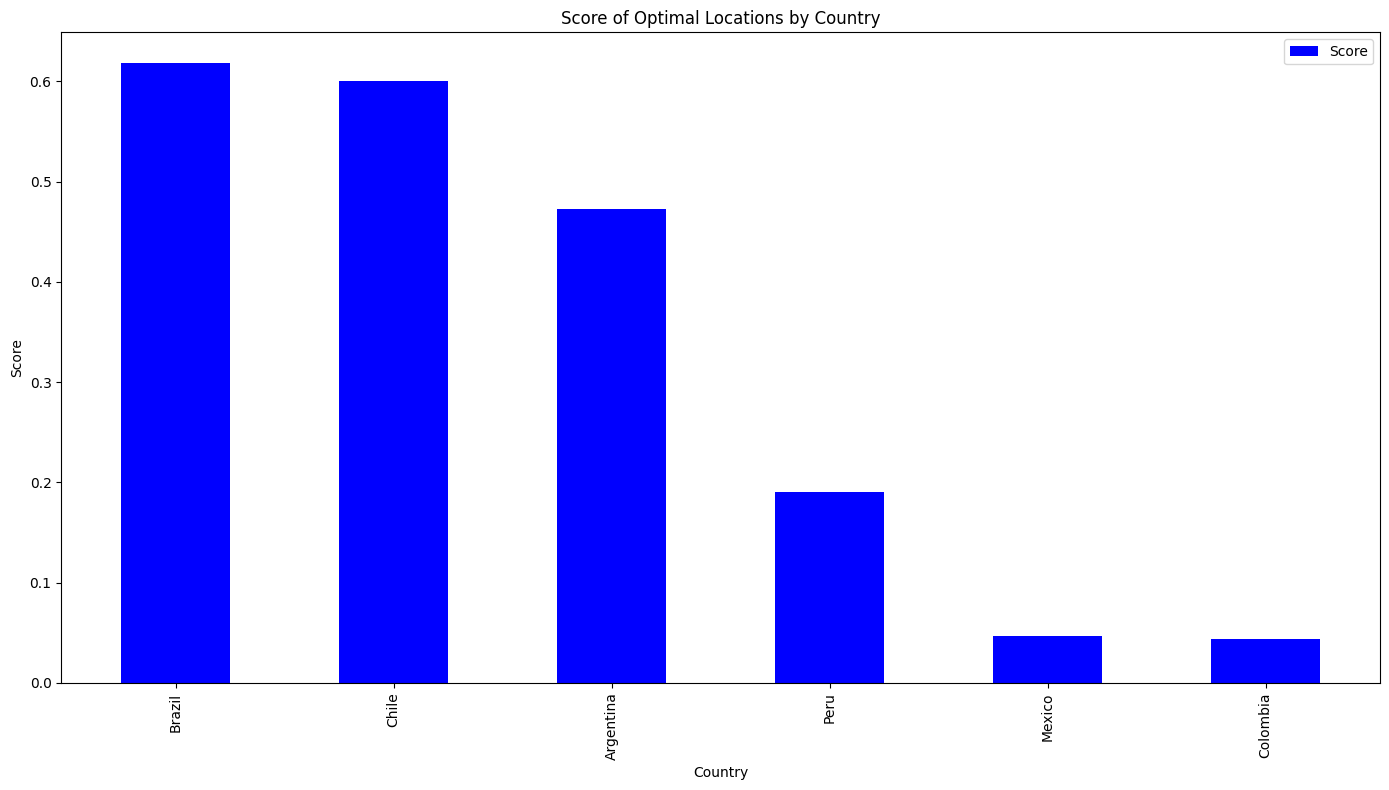

In [127]:
import matplotlib.pyplot as plt

# Configurar el gráfico de barras para el score en optimal_locations
fig, ax = plt.subplots(figsize=(14, 8))

# Índices para las barras
index = range(len(optimal_locations['country_name']))
bar_width = 0.5

# Gráfico de barras para el score
bars = plt.bar(index, optimal_locations['score'], bar_width, color='b', label='Score')

# Configurar etiquetas y título
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Score of Optimal Locations by Country')
plt.xticks(index, optimal_locations['country_name'], rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Con los datos obtenidos, creamos el dashboard de acuerdo a mostrar el objetivo planteado.

In [128]:
Infraestructure.to_csv('Infraestructure_analysis.csv', index=False)
summary_data.to_csv('summary_data_analysis.csv', index=False)
optimal_locations.to_csv('optimal_locations_analysis.csv', index=False)

In [129]:
import pandas as pd

summary_data_analysis = pd.read_csv(r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\summary_data_analysis.csv')

print(summary_data_analysis)

  country_name  incidences  vaccination_rate  hospital_infrastructure
0    Argentina  9697763.00              2.43                     4.32
1       Brazil 34568833.00              1.64                     3.72
2        Chile  4765656.10              3.54                     4.49
3     Colombia  6304317.00              1.72                     1.77
4       Mexico  4765656.10              1.89                     1.74
5         Peru  4765656.10              2.85                     1.68


In [130]:
import pandas as pd

summary_analysis = pd.read_csv(r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\summary_analysis.csv')

print(summary_analysis)

  country_name  incidences  vaccination_rate  hospital_infrastructure  score
0    Argentina        0.17              0.42                     0.94   0.47
1       Brazil        1.00              0.00                     0.73   0.62
2        Chile        0.00              1.00                     1.00   0.60
3     Colombia        0.05              0.04                     0.03   0.04
4       Mexico        0.00              0.13                     0.02   0.05
5         Peru        0.00              0.64                     0.00   0.19


In [131]:
import pandas as pd

optimal_locations_analysis = pd.read_csv(r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\optimal_locations_analysis.csv')

print(optimal_locations_analysis)

  country_name  incidences  vaccination_rate  hospital_infrastructure  score
0       Brazil        1.00              0.00                     0.73   0.62
1        Chile        0.00              1.00                     1.00   0.60
2    Argentina        0.17              0.42                     0.94   0.47
3         Peru        0.00              0.64                     0.00   0.19
4       Mexico        0.00              0.13                     0.02   0.05
5     Colombia        0.05              0.04                     0.03   0.04


In [1]:
import pandas as pd

Infraestructure_analysis = pd.read_csv(r'C:\Users\Administrator\Documents\CF\CIENCIA DE DATOS IA\Data Analytics\M4\Python\PI4\Infraestructure_analysis.csv')

print(Infraestructure_analysis)

  country_name  beds_per_1000  physicians_per_1000  nurses_per_1000
0    Argentina            5.2               3.9901           2.5996
1       Brazil            2.1               2.1643          10.1190
2        Chile            2.1               2.5912          13.3248
3     Colombia            1.7               2.1848           1.3309
4       Mexico            1.1               2.3827           2.3961
5         Peru            1.6               1.3048           2.4398


Cargamos los archivos anteriores a Power Bi para la elaboracion de los graficos, junto con 'Hospital_Beds_Per_1000.csv'

### 3. Visualizaciones Estáticas vs. Interactivas:

Las visualizaciones estáticas, como gráficos y tablas en reportes impresos, son beneficiosas para presentar información clara y concisa que no requiere interacción del usuario. Son ideales para distribuir informes en formato físico o PDF, garantizando que todos los destinatarios vean la misma información sin la necesidad de herramientas adicionales para la visualización. Además, las visualizaciones estáticas son fáciles de interpretar y pueden ser diseñadas para resaltar puntos específicos de manera efectiva.

Por otro lado, las visualizaciones interactivas en dashboards digitales, como los que se pueden crear en PowerBI, permiten a los usuarios explorar los datos de manera dinámica. Estas visualizaciones facilitan la profundización en los datos, permitiendo filtrar, hacer zoom y seleccionar diferentes métricas en tiempo real. Esto es especialmente útil para análisis exploratorios y presentaciones en vivo, donde las necesidades de información pueden cambiar rápidamente. Además, PowerBI permite ejecutar códigos de Python, integrando análisis avanzados y visualizaciones personalizadas dentro del dashboard interactivo, ofreciendo así una mayor flexibilidad y capacidad analítica.

### EXTRA CREDIT
Pasos Futuros y Mejoras Sugeridas
¡Enhorabuena por completar con éxito el Proyecto Integrador "Expansión Estratégica de Biogenesys con Python"! Has demostrado un gran compromiso y habilidad en el análisis de datos. Aquí te sugerimos algunas áreas para expandir y mejorar el análisis:

1. Incorporación de Más Fuentes de Datos:
Durante el proyecto, investigamos datos cruciales como el número de camas hospitalarias por país, tasas de vacunación y casos de COVID-19. Para enriquecer el análisis, sugerimos incorporar datos adicionales como:

Datos demográficos detallados (edad, género, comorbilidades) que pueden influir en la propagación del COVID-19 y la efectividad de las campañas de vacunación.
Datos socioeconómicos, como niveles de educación y pobreza, que pueden afectar la accesibilidad y aceptación de las vacunas.
Información sobre movilidad y transporte, que puede proporcionar insights sobre cómo los patrones de movimiento afectan la propagación del virus.
2. Implementación de Inteligencia de Tiempo en PowerBI:
Explorar la inteligencia de tiempo en PowerBI permitirá un análisis más detallado de las tendencias y patrones temporales. Esto incluye:

Creación de medidas de tiempo acumuladas (año a la fecha, mes a la fecha).
Análisis de estacionalidad y tendencias a lo largo del tiempo para identificar picos y valles en la incidencia de COVID-19 y las tasas de vacunación.
Uso de segmentaciones de datos y líneas de tiempo interactivas para permitir a los usuarios explorar datos específicos por periodos.
3. Aplicación de Modelos de Machine Learning:
Para predecir tendencias futuras, los modelos de machine learning pueden ser extremadamente útiles. Considera la implementación de:

Modelos de Series Temporales: Modelos como ARIMA, Prophet o LSTM pueden ser utilizados para predecir futuros casos de COVID-19 y tasas de vacunación basándose en datos históricos.
Modelos de Clasificación y Regresión: Utilizar técnicas de machine learning para identificar factores determinantes que afectan la eficacia de las campañas de vacunación y la infraestructura sanitaria.
Clustering: Agrupar regiones o países con características similares para identificar patrones y sugerir estrategias específicas para diferentes clusters.
Sugerencia General:
Para implementar estas mejoras, se recomienda continuar utilizando PowerBI para la visualización interactiva y Python para el análisis de datos y la implementación de modelos de machine learning. Integrar estas herramientas permitirá un análisis más profundo y flexible, proporcionando insights valiosos para la expansión estratégica de Biogenesys.